# Myopic Foresight 
Author: Katherine Shaw
May 26, 2025

## First Myopic Foresight investigation

In [1]:
#Packages 
import pypsa
import matplotlib.pyplot as plt 
import cartopy 
import geopandas
import networkx
import linopy
import cartopy.crs as ccrs
import atlite 
import geopandas as gpd 
import xarray
import pandas as pd 
from datetime import datetime
import numpy as np
from pypsa.plot import add_legend_patches
import random

## Overall view of colors matched to carriers 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:323: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


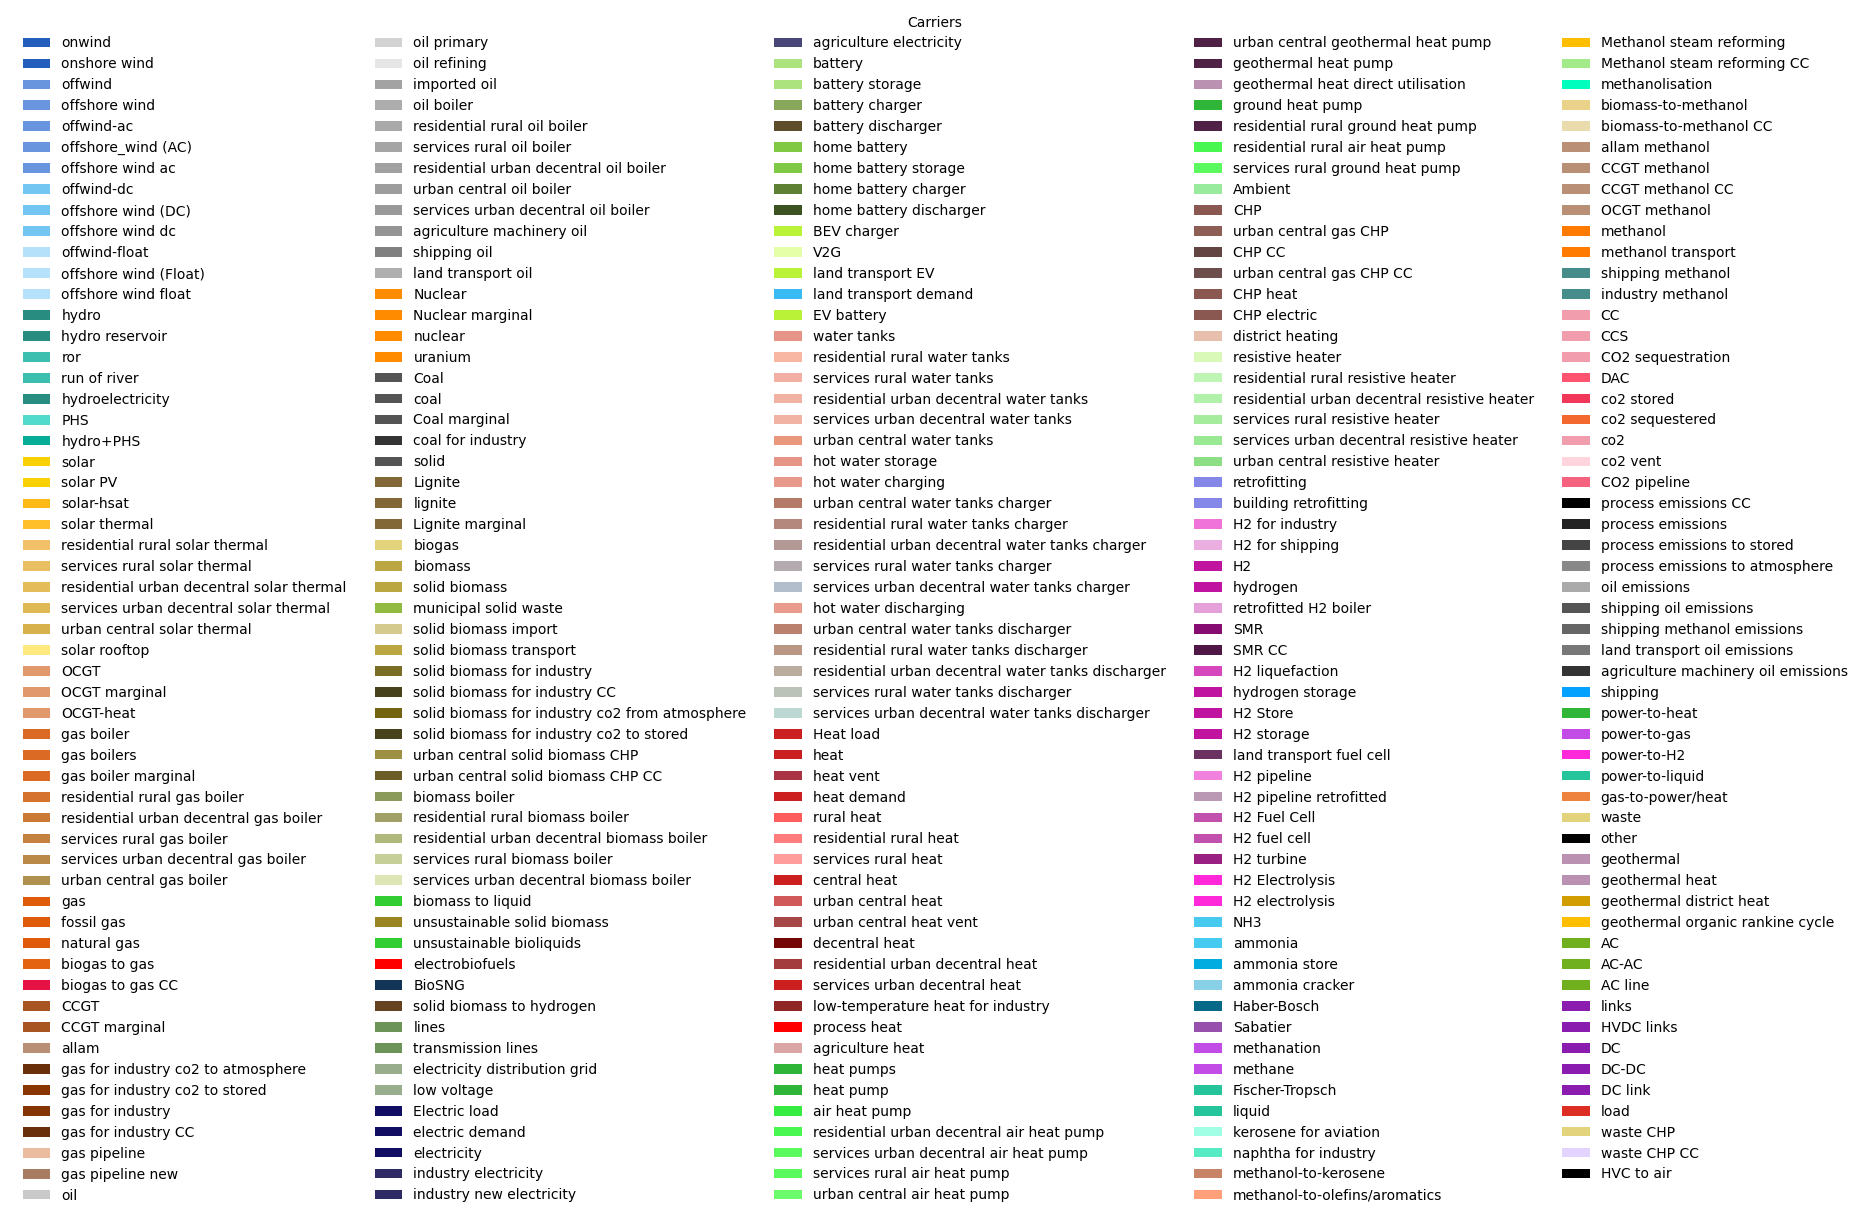

In [10]:
# colors associated with each carrier for graphing/plotting consistently across network runs or different datasets
tech_colors = {
    'onwind': "#235ebc",
    'onshore wind': "#235ebc",
    'offwind': "#6895dd",
    'offshore wind': "#6895dd",
    'offwind-ac': "#6895dd",
    'offshore_wind (AC)': "#6895dd",
    'offshore wind ac': "#6895dd",
    'offwind-dc': "#74c6f2",
    'offshore wind (DC)': "#74c6f2",
    'offshore wind dc': "#74c6f2",
    'offwind-float': "#b5e2fa",
    'offshore wind (Float)': "#b5e2fa",
    'offshore wind float': "#b5e2fa",
    'hydro': '#298c81',
    'hydro reservoir': '#298c81',
    'ror': '#3dbfb0',
    'run of river': '#3dbfb0',
    'hydroelectricity': '#298c81',
    'PHS': '#51dbcc',
    'hydro+PHS': "#08ad97",
    'solar': "#f9d002",
    'solar PV': "#f9d002",
    'solar-hsat': "#fdb915",
    'solar thermal': '#ffbf2b',
    'residential rural solar thermal': '#f1c069',
    'services rural solar thermal': '#eabf61',
    'residential urban decentral solar thermal': '#e5bc5a',
    'services urban decentral solar thermal': '#dfb953',
    'urban central solar thermal': '#d7b24c',
    'solar rooftop': '#ffea80',
    'OCGT': '#e0986c',
    'OCGT marginal': '#e0986c',
    'OCGT-heat': '#e0986c',
    'gas boiler': '#db6a25',
    'gas boilers': '#db6a25',
    'gas boiler marginal': '#db6a25',
    'residential rural gas boiler': '#d4722e',
    'residential urban decentral gas boiler': '#cb7a36',
    'services rural gas boiler': '#c4813f',
    'services urban decentral gas boiler': '#ba8947',
    'urban central gas boiler': '#b0904f',
    'gas': '#e05b09',
    'fossil gas': '#e05b09',
    'natural gas': '#e05b09',
    'biogas to gas': '#e36311',
    'biogas to gas CC': '#e51245',
    'CCGT': '#a85522',
    'CCGT marginal': '#a85522',
    'allam': '#B98F76',
    'gas for industry co2 to atmosphere': '#692e0a',
    'gas for industry co2 to stored': '#8a3400',
    'gas for industry': '#853403',
    'gas for industry CC': '#692e0a',
    'gas pipeline': '#ebbca0',
    'gas pipeline new': '#a87c62',
    'oil': '#c9c9c9',
    'oil primary': '#d2d2d2',
    'oil refining': '#e6e6e6',
    'imported oil': '#a3a3a3',
    'oil boiler': '#adadad',
    'residential rural oil boiler': '#a9a9a9',
    'services rural oil boiler': '#a5a5a5',
    'residential urban decentral oil boiler': '#a1a1a1',
    'urban central oil boiler': '#9d9d9d',
    'services urban decentral oil boiler': '#999999',
    'agriculture machinery oil': '#949494',
    'shipping oil': "#808080",
    'land transport oil': '#afafaf',
    'Nuclear': '#ff8c00',
    'Nuclear marginal': '#ff8c00',
    'nuclear': '#ff8c00',
    'uranium': '#ff8c00',
    'Coal': '#545454',
    'coal': '#545454',
    'Coal marginal': '#545454',
    'coal for industry': '#343434',
    'solid': '#545454',
    'Lignite': '#826837',
    'lignite': '#826837',
    'Lignite marginal': '#826837',
    'biogas': '#e3d37d',
    'biomass': '#baa741',
    'solid biomass': '#baa741',
    'municipal solid waste': '#91ba41',
    'solid biomass import': '#d5ca8d',
    'solid biomass transport': '#baa741',
    'solid biomass for industry': '#7a6d26',
    'solid biomass for industry CC': '#47411c',
    'solid biomass for industry co2 from atmosphere': '#736412',
    'solid biomass for industry co2 to stored': '#47411c',
    'urban central solid biomass CHP': '#9d9042',
    'urban central solid biomass CHP CC': '#6c5d28',
    'biomass boiler': '#8A9A5B',
    'residential rural biomass boiler': '#a1a066',
    'residential urban decentral biomass boiler': '#b0b87b',
    'services rural biomass boiler': '#c6cf98',
    'services urban decentral biomass boiler': '#dde5b5',
    'biomass to liquid': '#32CD32',
    'unsustainable solid biomass': '#998622',
    'unsustainable bioliquids': '#32CD32',
    'electrobiofuels': '#FF0000',
    'BioSNG': '#123456',
    'solid biomass to hydrogen': '#654321',
    'lines': '#6c9459',
    'transmission lines': '#6c9459',
    'electricity distribution grid': '#97ad8c',
    'low voltage': '#97ad8c',
    'Electric load': '#110d63',
    'electric demand': '#110d63',
    'electricity': '#110d63',
    'industry electricity': '#2d2a66',
    'industry new electricity': '#2d2a66',
    'agriculture electricity': '#494778',
    'battery': '#ace37f',
    'battery storage': '#ace37f',
    'battery charger': '#88a75b',
    'battery discharger': '#5d4e29',
    'home battery': '#80c944',
    'home battery storage': '#80c944',
    'home battery charger': '#5e8032',
    'home battery discharger': '#3c5221',
    'BEV charger': '#baf238',
    'V2G': '#e5ffa8',
    'land transport EV': '#baf238',
    'land transport demand': '#38baf2',
    'EV battery': '#baf238',
    'water tanks': '#e69487',
    'residential rural water tanks': '#f7b7a3',
    'services rural water tanks': '#f3afa3',
    'residential urban decentral water tanks': '#f2b2a3',
    'services urban decentral water tanks': '#f1b4a4',
    'urban central water tanks': '#e9977d',
    'hot water storage': '#e69487',
    'hot water charging': '#e8998b',
    'urban central water tanks charger': '#b57a67',
    'residential rural water tanks charger': '#b4887c',
    'residential urban decentral water tanks charger': '#b39995',
    'services rural water tanks charger': '#b3abb0',
    'services urban decentral water tanks charger': '#b3becc',
    'hot water discharging': '#e99c8e',
    'urban central water tanks discharger': '#b9816e',
    'residential rural water tanks discharger': '#ba9685',
    'residential urban decentral water tanks discharger': '#baac9e',
    'services rural water tanks discharger': '#bbc2b8',
    'services urban decentral water tanks discharger': '#bdd8d3',
    'Heat load': '#cc1f1f',
    'heat': '#cc1f1f',
    'heat vent': '#aa3344',
    'heat demand': '#cc1f1f',
    'rural heat': '#ff5c5c',
    'residential rural heat': '#ff7c7c',
    'services rural heat': '#ff9c9c',
    'central heat': '#cc1f1f',
    'urban central heat': '#d15959',
    'urban central heat vent': '#a74747',
    'decentral heat': '#750606',
    'residential urban decentral heat': '#a33c3c',
    'services urban decentral heat': '#cc1f1f',
    'low-temperature heat for industry': '#8f2727',
    'process heat': '#ff0000',
    'agriculture heat': '#d9a5a5',
    'heat pumps': '#2fb537',
    'heat pump': '#2fb537',
    'air heat pump': '#36eb41',
    'residential urban decentral air heat pump': '#48f74f',
    'services urban decentral air heat pump': '#5af95d',
    'services rural air heat pump': '#5af95d',
    'urban central air heat pump': '#6cfb6b',
    'urban central geothermal heat pump': '#4f2144',
    'geothermal heat pump': '#4f2144',
    'geothermal heat direct utilisation': '#ba91b1',
    'ground heat pump': '#2fb537',
    'residential rural ground heat pump': '#4f2144',
    'residential rural air heat pump': '#48f74f',
    'services rural ground heat pump': '#5af95d',
    'Ambient': '#98eb9d',
    'CHP': '#8a5751',
    'urban central gas CHP': '#8d5e56',
    'CHP CC': '#634643',
    'urban central gas CHP CC': '#6e4e4c',
    'CHP heat': '#8a5751',
    'CHP electric': '#8a5751',
    'district heating': '#e8beac',
    'resistive heater': '#d8f9b8',
    'residential rural resistive heater': '#bef5b5',
    'residential urban decentral resistive heater': '#b2f1a9',
    'services rural resistive heater': '#a5ed9d',
    'services urban decentral resistive heater': '#98e991',
    'urban central resistive heater': '#8cdf85',
    'retrofitting': '#8487e8',
    'building retrofitting': '#8487e8',
    'H2 for industry': "#f073da",
    'H2 for shipping': "#ebaee0",
    'H2': '#bf13a0',
    'hydrogen': '#bf13a0',
    'retrofitted H2 boiler': '#e5a0d9',
    'SMR': '#870c71',
    'SMR CC': '#4f1745',
    'H2 liquefaction': '#d647bd',
    'hydrogen storage': '#bf13a0',
    'H2 Store': '#bf13a0',
    'H2 storage': '#bf13a0',
    'land transport fuel cell': '#6b3161',
    'H2 pipeline': '#f081dc',
    'H2 pipeline retrofitted': '#ba99b5',
    'H2 Fuel Cell': '#c251ae',
    'H2 fuel cell': '#c251ae',
    'H2 turbine': '#991f83',
    'H2 Electrolysis': '#ff29d9',
    'H2 electrolysis': '#ff29d9',
    'NH3': '#46caf0',
    'ammonia': '#46caf0',
    'ammonia store': '#00ace0',
    'ammonia cracker': '#87d0e6',
    'Haber-Bosch': '#076987',
    'Sabatier': '#9850ad',
    'methanation': '#c44ce6',
    'methane': '#c44ce6',
    'Fischer-Tropsch': '#25c49a',
    'liquid': '#25c49a',
    'kerosene for aviation': '#a1ffe6',
    'naphtha for industry': '#57ebc4',
    'methanol-to-kerosene': '#C98468',
    'methanol-to-olefins/aromatics': '#FFA07A',
    'Methanol steam reforming': '#FFBF00',
    'Methanol steam reforming CC': '#A2EA8A',
    'methanolisation': '#00FFBF',
    'biomass-to-methanol': '#EAD28A',
    'biomass-to-methanol CC': '#EADBAD',
    'allam methanol': '#B98F76',
    'CCGT methanol': '#B98F76',
    'CCGT methanol CC': '#B98F76',
    'OCGT methanol': '#B98F76',
    'methanol': '#FF7B00',
    'methanol transport': '#FF7B00',
    'shipping methanol': '#468c8b',
    'industry methanol': '#468c8b',
    'CC': '#f29dae',
    'CCS': '#f29dae',
    'CO2 sequestration': '#f29dae',
    'DAC': '#ff5270',
    'co2 stored': '#f2385a',
    'co2 sequestered': '#f2682f',
    'co2': '#f29dae',
    'co2 vent': '#ffd4dc',
    'CO2 pipeline': '#f5627f',
    'process emissions CC': '#000000',
    'process emissions': '#222222',
    'process emissions to stored': '#444444',
    'process emissions to atmosphere': '#888888',
    'oil emissions': '#aaaaaa',
    'shipping oil emissions': "#555555",
    'shipping methanol emissions': '#666666',
    'land transport oil emissions': '#777777',
    'agriculture machinery oil emissions': '#333333',
    'shipping': '#03a2ff',
    'power-to-heat': '#2fb537',
    'power-to-gas': '#c44ce6',
    'power-to-H2': '#ff29d9',
    'power-to-liquid': '#25c49a',
    'gas-to-power/heat': '#ee8340',
    'waste': '#e3d37d',
    'other': '#000000',
    'geothermal': '#ba91b1',
    'geothermal heat': '#ba91b1',
    'geothermal district heat': '#d19D00',
    'geothermal organic rankine cycle': '#ffbf00',
    'AC': "#70af1d",
    'AC-AC': "#70af1d",
    'AC line': "#70af1d",
    'links': "#8a1caf",
    'HVDC links': "#8a1caf",
    'DC': "#8a1caf",
    'DC-DC': "#8a1caf",
    'DC link': "#8a1caf",
    'load': "#dd2e23",
    'waste CHP': '#e3d37d',
    'waste CHP CC': '#e3d3ff',
    'HVC to air': '#000000',
}

#emissions generated in the model by generators or in the atmospheric
def carbon_emissions(network):
    carbon_emissions_generators = (network.snapshot_weightings.generators @ network.generators_t.p) / network.generators.efficiency * network.generators.carrier.map(network.carriers.co2_emissions) #Units: MWh / (efficency if thermal and not electric (MWh_el/ MWh_th) ??) * tonnes CO2/MWh
    # This is tonnes co2 emitted from the generators
    carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]
    #the c02 atmosphere store inherits the energy carrier from the bus 
    #the unit of the co2 atmosphere bus is t_co2, so I'm assuming here that the store input is also ton co2
    #the efficiency2 of the links between the conventional carriers are in tCO2/MWh (usually MWh_th), so yes, it is entering the stores in tCO2
    return (carbon_emissions_generators, carbon_emissions_atmosphere)

#Note, the initial value of the co2 atmosphere store is not 0, the starting value is simillar to the by-step carbon additions
#so right now I have to operate under the assumption that the beginning value is actually the ammount emitted in an initial period of 6 hours (or so?) before the first snapshot 

## Function that converts color format for later plotting
def hex_to_rgba(hex_color, alpha=1.0):
    """Convert hex color to normalized RGBA tuple (0-1 values)."""
    hex_color = hex_color.lstrip('#')
    if len(hex_color) == 6:
        rgb = tuple(int(hex_color[i:i+2], 16)/255 for i in (0, 2, 4))
        return (*rgb, alpha)
    raise ValueError(f"Invalid hex color: {hex_color}")

# Create legend handles from the dictionary
legend_handles = [Patch(facecolor=color, label=carrier) for carrier, color in tech_colors.items()]

# Create a blank figure just for the legend (or attach to an existing one)
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')  # hide the axes

# Add the legend
ax.legend(
    handles=legend_handles,
    title="Carriers",
    loc="center left",
    frameon=False,
    bbox_to_anchor=(0, 0.5),
    ncols = 5,
)

plt.tight_layout()
plt.show()

INFO:pypsa.io:Imported network base_s_39___2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/Users/katherine.shaw/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


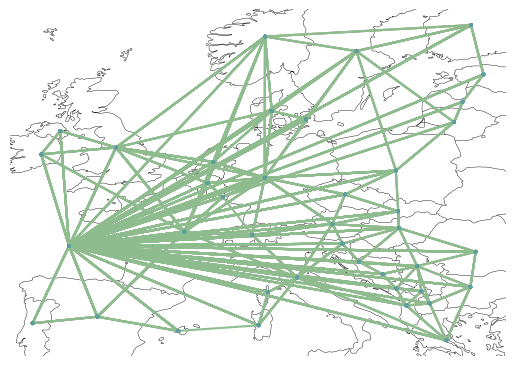

/Users/katherine.shaw/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


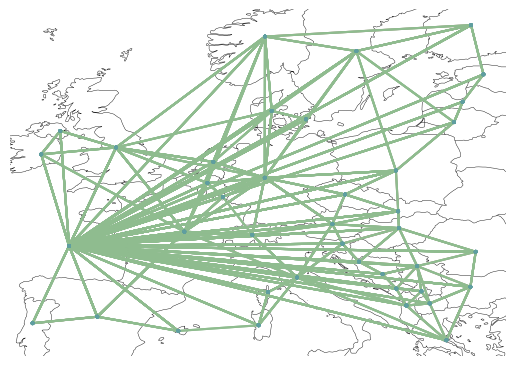

/Users/katherine.shaw/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


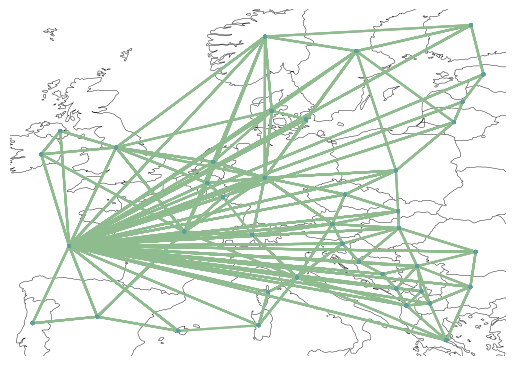

/Users/katherine.shaw/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


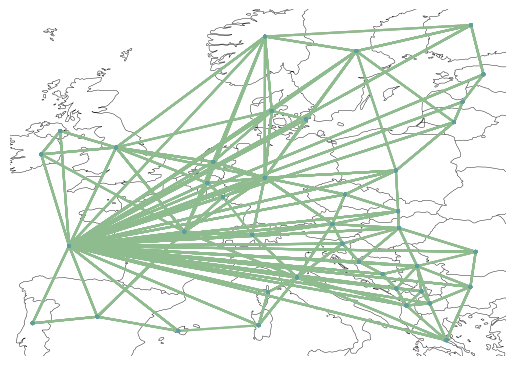

In [4]:
n_2025 = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2025.nc')
n_2030 = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2030.nc')
n_2040 = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2040.nc')
n_2050 = pypsa.Network('/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2050.nc')

n_2025.plot()
plt.show()
n_2030.plot()
plt.show()
n_2040.plot()
plt.show()
n_2050.plot()
plt.show()



/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric


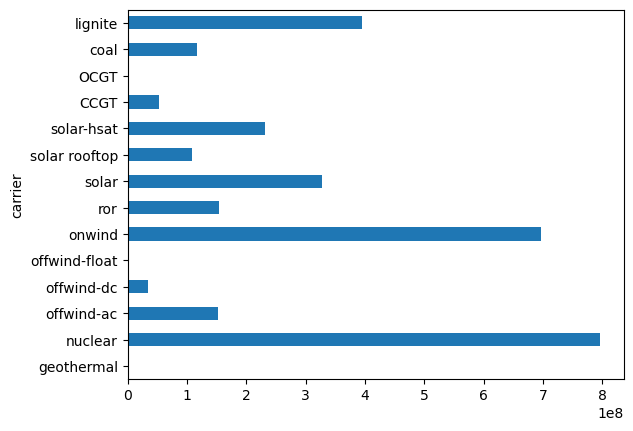

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric


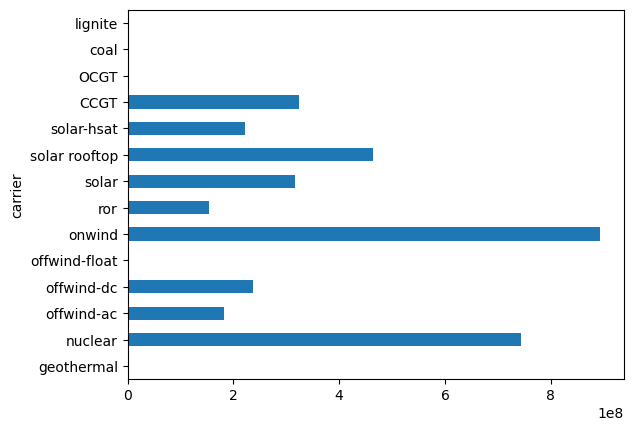

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric


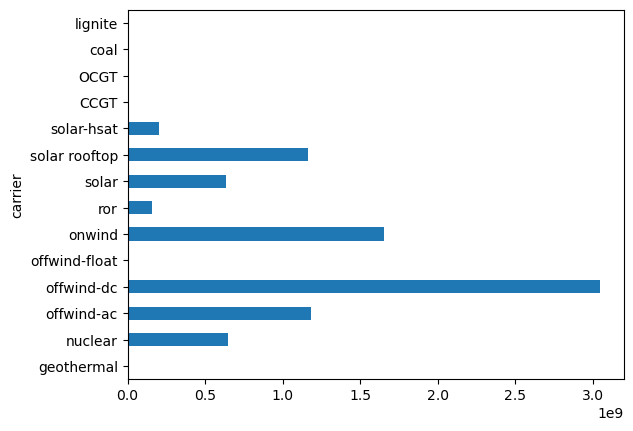

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric


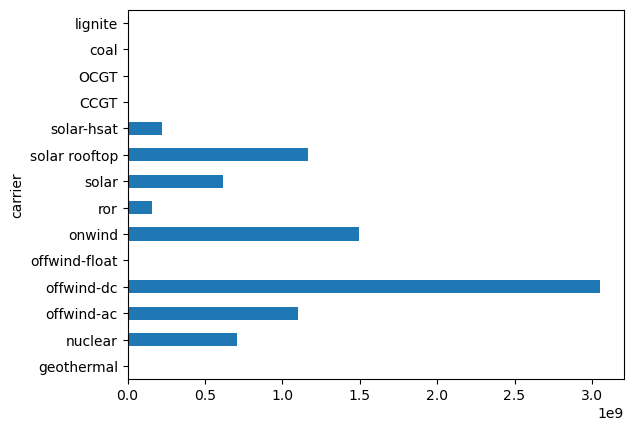

In [8]:
#bus_connections(n_test, 'GB2 0 low voltage') #home battery and EV battery buses are prurely stores
#there are no loads connected to the transmission level country bus
#so really, to see what is satisfying the electric demands, I have to account for every link incoming to the low voltage stores and every generator
#the only incoming links are from country level and home battery level, but lots of different types of things connect to home battery level
#just looking at dispatch....
#regarding the loads, the only electric (aka non-material load) NOT connected to the low voltage bus is the EV load, which is connected to the EV bus which is connected to the low voltage bus
#so the question becomes, to I take all generation from generators connected to the AC buses, which may include electricty from renewables attached to the [country]0 bus but not used by the doemestic load
#I.E., some may be used to electrolyze water into hydrogen...
#I mean likewise some of the electricity that makes its way through low voltage, don't have a way to really track where that goes...
#So it's decided, generators attached to "any bus that has units of MWh_el"

#2025 network
n_2025.buses[n_2025.buses.unit == 'MWh_el'].index
def carrier_totals_sector(network, sector_option):
    #sector option, i.e. -- what form is the energy in before it gets used by a load? 
    #options include: electric, gas -- but this gas must be gas that does not go to the [country]0 buses, 
    # heating (I am guessing here that there are not generators attached to the heating buses, only links, so can use links as a proxy for generation (arrived power/efficiency == original generation))

    #getting all generation in terms of MWh
    carrier_totals_year = network.generators_t.p.T.groupby([network.generators.carrier, network.generators.bus]).sum().copy()
    carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]

    #filtering if you want all generation making it's way to the low voltage network, where the residential, agricultural electricity, industrial electricity, and one connection away from EV battery 
    if sector_option == 'electric':
        bus_filter = network.buses[network.buses.unit == 'MWh_el'].index
        mask1 = carrier_totals_year.index.get_level_values(1).isin(bus_filter)

        carrier_totals_year_filtered = carrier_totals_year[carrier_totals_year.index.get_level_values(1).isin(bus_filter)] #in Mwh
        carrier_totals_year_filtered = carrier_totals_year_filtered.sum(axis=1)
        carrier_totals_year_filtered = carrier_totals_year_filtered.groupby('carrier').sum()
        #for all generation that comes from links from conventional carriers
        link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric 
        link_addition = link_addition[link_addition.index.get_level_values(1).isin(bus_filter)]
        carrier_filter = ['coal', 'lignite', 'CCGT', 'OCGT'] #additional bus filter for links to limit to conventional generators
        link_addition = link_addition[link_addition.index.get_level_values(0).isin(carrier_filter) ]
        link_addition = - link_addition.groupby('carrier').sum()
        link_addition = link_addition.sum(axis=1)
        carrier_totals_year_filtered = pd.concat([carrier_totals_year_filtered, link_addition])\
        
    #what are all the links going from a conventional generator to the low voltage loads?
    #n_test.links[n_test.links.bus0 == 'EU lignite']
    #n_test.links[n_test.links.bus0 == 'AL0 0']
    #ugh, no way to disentangle coal or lignite from each other in the al0 to al0 0 low voltage grid, have to say how much is transmitted to the AC level (but that's true for every generator except solar rooftop)
    # still saying, how much MWh_el did you get from coal... it's just that that Mwh_el might be going to the battery, low voltage, or H3

    return carrier_totals_year_filtered

carrier_totals_sector(n_2025, 'electric').plot.barh()
plt.show()
carrier_totals_sector(n_2030, 'electric').plot.barh()
plt.show()
carrier_totals_sector(n_2040, 'electric').plot.barh()
plt.show()
carrier_totals_sector(n_2050, 'electric').plot.barh()
plt.show()

In [11]:
#Create an output of statistics for the model
def model_statistics(n):
    #Total Cost
    system_cost = "{:e}".format(n.objective)
    print('The total system cost as defined by the objective function is :   ')
    print(str(system_cost) + '  EUR')
    print()

    #number of nodes 
    print('The number of nodes is :'  + str(len(n.buses[n.buses['carrier'] == 'AC'])))  
    print()

    print('The carriers with CO2 emissions registered by the model are :  ')
    n_carriers_c02 = n.carriers[n.carriers['co2_emissions'] != 0.0000]
    print(n_carriers_c02.index.values)
    print()
    print('Answer the question: are all the conventional carriers associated with a non-zero carrier carbon emission values?')
    print()
    #The total amount of line length 
    print("The total length of AC lines and DC links in the model is:")
    DC_links = n.links[n.links.carrier == 'DC']
    print(str((n.lines.length.sum() + DC_links.length.sum())) + '  km')
    print()
    
    #the amount of energy curtailed in the model 
    print()
    print('The amount of energy curtailed in the model by carrier is : ')
    print(n.statistics.curtailment())
    print()
    print('Therefore the total amount curtailed is  : ' + str("{:e}".format(n.statistics.curtailment().sum())) + '   MWh per year')
    print()

    #emissions generated in the model

    carbon_emissions1 = carbon_emissions(n)[0]
    print('The carbon emissions registered by the model from generator are ' + str("{:e}".format(carbon_emissions1.sum())) +  '   tonnes CO2 per year')
    carbon_emissions2 = carbon_emissions(n)[1]
    print('The carbon emissions registered by the model in the co2_atmosphere store  ' + str("{:e}".format(-carbon_emissions2)) + '   tonnes CO2')
    print()
 

    #Generators in the model 
    generator_carriers = n.generators.carrier.unique()
    print('The generators types included in this model are :  ')
    print(generator_carriers)
    print()

    #Carriers in the model 
    carrier_types = n.carriers.head(50)
    print('The carriers included in this model are :   ')
    print(n.carriers.index.values)
    print()

    #The demand across the sectors
    n.loads_t.p.columns


    #The global constraints on the model 
    print('The global constrains on the model are:')
    print(n.global_constraints)

    return None 

#Run the model statistics function on each of the networks
model_statistics(n_2025)
model_statistics(n_2030)
model_statistics(n_2040)
model_statistics(n_2050)


The total system cost as defined by the objective function is :   
5.056758e+11  EUR

The number of nodes is :39

The carriers with CO2 emissions registered by the model are :  
['geothermal' 'co2']

Answer the question: are all the conventional carriers associated with a non-zero carrier carbon emission values?

The total length of AC lines and DC links in the model is:
57181.48846262081  km


The amount of energy curtailed in the model by carrier is : 
component    carrier                                  
StorageUnit  Pumped Hydro Storage                         5.138225e+08
             Reservoir & Dam                              6.028125e+08
Generator    Offshore Wind (AC)                           4.077261e+05
             Offshore Wind (DC)                           5.167564e+01
             Offshore Wind (Floating)                     3.828277e+01
             Onshore Wind                                 9.084930e+06
             Run of River                                 5.

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]


Therefore the total amount curtailed is  : 1.273793e+13   MWh per year

The carbon emissions registered by the model from generator are 1.029852e+05   tonnes CO2 per year
The carbon emissions registered by the model in the co2_atmosphere store  -2.071763e+09   tonnes CO2

The generators types included in this model are :  
['nuclear' 'geothermal' 'solar' 'offwind-ac' 'offwind-dc' 'offwind-float'
 'onwind' 'solar-hsat' 'ror' 'lignite' 'coal' 'oil primary' 'gas'
 'urban central heat vent' 'urban central solar thermal' 'biogas'
 'solid biomass' 'unsustainable biogas' 'unsustainable solid biomass'
 'unsustainable bioliquids' 'solar rooftop' 'rural solar thermal'
 'urban decentral solar thermal']

The carriers included in this model are :   
['AC' 'DC' 'nuclear' 'geothermal' 'hydro' 'solar' 'offwind-ac'
 'offwind-float' 'offwind-dc' 'onwind' 'solar-hsat' 'ror' 'PHS' ''
 'lignite' 'coal' 'oil' 'uranium' 'none' 'co2' 'co2 stored'
 'co2 sequestered' 'gas' 'H2' 'battery' 'EV battery' 'urban cen

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]


Therefore the total amount curtailed is  : 1.208707e+13   MWh per year

The carbon emissions registered by the model from generator are 1.029766e+05   tonnes CO2 per year
The carbon emissions registered by the model in the co2_atmosphere store  -4.603917e+08   tonnes CO2

The generators types included in this model are :  
['nuclear' 'geothermal' 'solar' 'offwind-ac' 'offwind-dc' 'offwind-float'
 'onwind' 'solar-hsat' 'ror' 'lignite' 'coal' 'oil primary' 'gas'
 'urban central heat vent' 'urban central solar thermal' 'biogas'
 'solid biomass' 'solar rooftop' 'rural solar thermal'
 'urban decentral solar thermal']

The carriers included in this model are :   
['AC' 'DC' 'nuclear' 'geothermal' 'hydro' 'solar' 'offwind-ac'
 'offwind-float' 'offwind-dc' 'onwind' 'solar-hsat' 'ror' 'PHS' ''
 'lignite' 'coal' 'oil' 'uranium' 'none' 'co2' 'co2 stored'
 'co2 sequestered' 'gas' 'H2' 'battery' 'EV battery' 'urban central heat'
 'urban central solar thermal' 'biogas' 'solid biomass' 'methanol'
 'h

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]


Therefore the total amount curtailed is  : 1.214578e+13   MWh per year

The carbon emissions registered by the model from generator are 1.030154e+05   tonnes CO2 per year
The carbon emissions registered by the model in the co2_atmosphere store  -2.301959e+08   tonnes CO2

The generators types included in this model are :  
['nuclear' 'geothermal' 'solar' 'offwind-ac' 'offwind-dc' 'offwind-float'
 'onwind' 'solar-hsat' 'ror' 'lignite' 'coal' 'oil primary' 'gas'
 'urban central heat vent' 'urban central solar thermal' 'biogas'
 'solid biomass' 'solar rooftop' 'rural solar thermal'
 'urban decentral solar thermal']

The carriers included in this model are :   
['AC' 'DC' 'nuclear' 'geothermal' 'hydro' 'solar' 'offwind-ac'
 'offwind-float' 'offwind-dc' 'onwind' 'solar-hsat' 'ror' 'PHS' ''
 'lignite' 'coal' 'oil' 'uranium' 'none' 'co2' 'co2 stored'
 'co2 sequestered' 'gas' 'H2' 'battery' 'EV battery' 'urban central heat'
 'urban central solar thermal' 'biogas' 'solid biomass' 'methanol'
 'h

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]


/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/2101808604.py:21: FutureWarn

conventional  geothermal    8.582786e+05
              nuclear       7.959077e+08
              CCGT          5.248207e+07
              OCGT          1.042601e+02
              coal          1.170309e+08
              lignite       3.955413e+08
dtype: float64
renewable  offwind-ac       1.527896e+08
           offwind-dc       3.371021e+07
           offwind-float    1.050252e+02
           onwind           6.962843e+08
           ror              1.543745e+08
           solar            3.279708e+08
           solar rooftop    1.083522e+08
           solar-hsat       2.316741e+08
dtype: float64
conventional  geothermal    8.582101e+05
              nuclear       7.437109e+08
              CCGT          3.241494e+08
              OCGT          4.924094e+01
              coal          1.779253e+04
              lignite       1.168849e+06
dtype: float64
renewable  offwind-ac       1.826990e+08
           offwind-dc       2.377943e+08
           offwind-float    8.529244e+01
           o

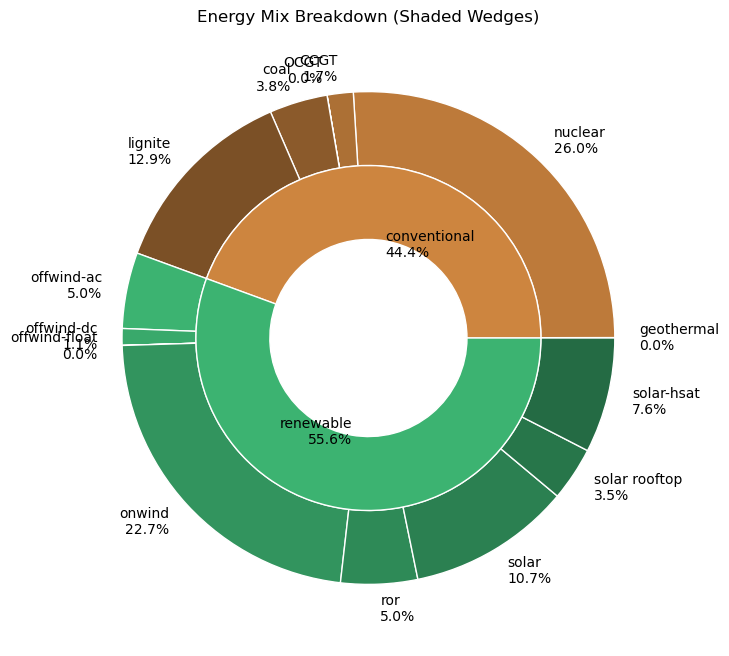

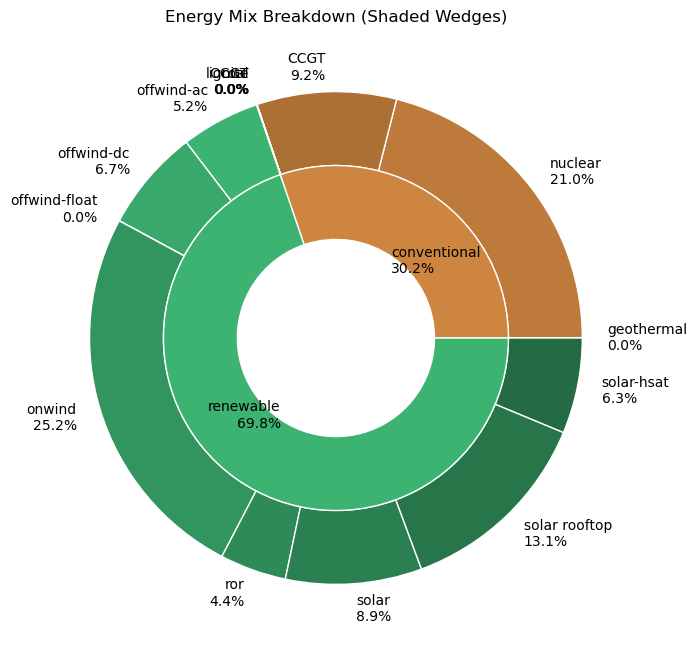

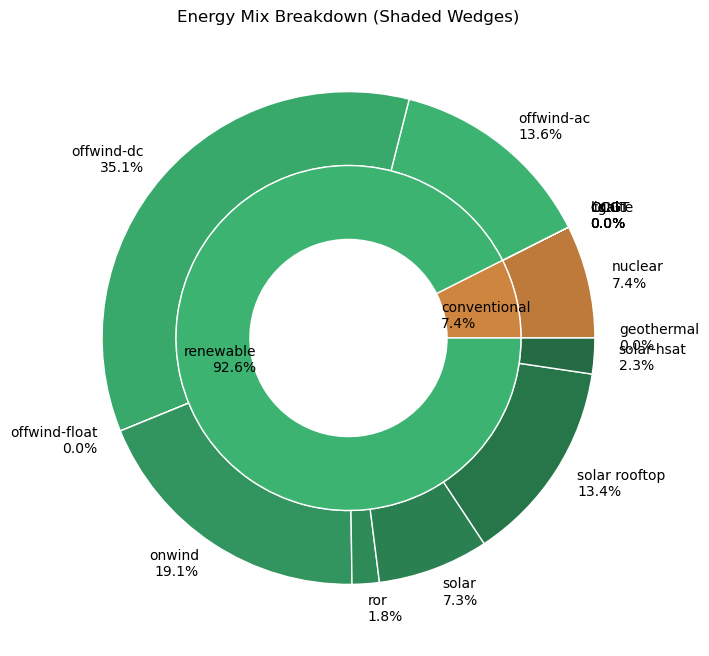

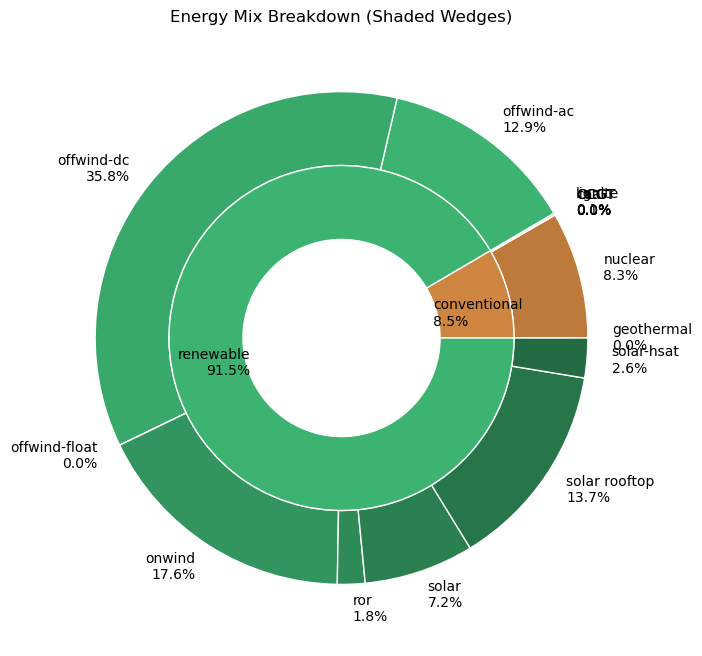

In [12]:
#Pie chart of total dispatch by carrier with a renewable/conventional breakdown
#Overall renewable vs dispatchable thermal generation used 
#what do I want? I want a pie graph seperated by conventional and renewable, then sub-sections by technology, with percentages of total electricity system 

# Note,this only creates a pie charge of carriers relative that have been selected in whatever sector you want relative to themselves, it is not total generation

def carrier_pie_chart(network): #this is for the electric sector only
    import matplotlib.pyplot as plt
    import pandas as pd
    import matplotlib.colors as mcolors
    import numpy as np 
    #nuclear included with conventional genrators here, different across different functions to deal with integration issues
    carrier_seperation_list = carrier_totals_sector(network, 'electric')
    conventional_carriers = ['nuclear', 'oil', 'OCGT', 'CCGT', 'coal', 'lignite', 'geothermal', 'solid biomass', 'biogas']
    renewable_carriers = ['solar', 'solar-hsat', 'onwind', 'offwind-ac', 'offwind-dc', 'offwind-float', 'offshore wind', 'hydro', 'ror', 'solar rooftop']

    conventional_sum = carrier_seperation_list[carrier_seperation_list.index.intersection(conventional_carriers)]
    renewable_sum = carrier_seperation_list[carrier_seperation_list.index.intersection(renewable_carriers)]

    #changing series to dictionaries (to make multi-index series)
    conventional_sum = conventional_sum.to_dict()
    renewable_sum = renewable_sum.to_dict()

    #adding in 'conventional' and 'renewable' for first index 
    conventional_sum = { 'conventional' : conventional_sum}
    renewable_sum = { 'renewable' : renewable_sum}

    #can I create a multi-index series where the first index is 'conventional' or 'renewable', and then the second index is the carrier and the values 
    conventional_sum = pd.Series({(outer, inner): val for outer, inner_dict in conventional_sum.items() for inner, val in inner_dict.items()})
    renewable_sum = pd.Series({(outer, inner): val for outer, inner_dict in renewable_sum.items() for inner, val in inner_dict.items()})
    print(conventional_sum)
    print(renewable_sum)

    # Combine the two series
    s_all = pd.concat([conventional_sum, renewable_sum])

    # Get groups and unique technologies
    groups = s_all.index.get_level_values(0).unique()
    technologies = s_all.index.get_level_values(1).unique()

    # Define base group colors
    group_base_colors = {
        'conventional': 'peru',          # light brown
        'renewable': 'mediumseagreen'    # light green
    }

    # Build consistent color map for each technology using alpha gradation
    tech_color_map = {}
    for group in groups:
        techs_in_group = s_all.loc[group].index.tolist()
        n = len(techs_in_group)
        base_rgba = np.array(mcolors.to_rgba(group_base_colors[group]))

        # Generate different alpha/brightness values
        for i, tech in enumerate(techs_in_group):
            # Slightly darken each successive wedge (adjust factor as needed)
            factor = 0.6 + 0.4 * (1 - i / max(1, n - 1))  # from 1.0 to 0.6
            shaded_rgb = base_rgba[:3] * factor
            tech_color_map[(group, tech)] = np.clip(shaded_rgb, 0, 1)

    # Compute group sums and total
    group_totals = s_all.groupby(level=0).sum()
    total_sum = s_all.sum()

    # Labels with percentages
    outer_labels = [
        f"{tech}\n{value / total_sum:.1%}" 
        for (_, tech), value in s_all.items()
    ]
    inner_labels = [
        f"{group}\n{value / total_sum:.1%}"
        for group, value in group_totals.items()
    ]

    # Colors from the map
    outer_colors = [tech_color_map[key] for key in s_all.index]
    inner_colors = [group_base_colors[group] for group in group_totals.index]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Outer ring: technologies
    ax.pie(
        s_all.values,
        radius=1,
        labels=outer_labels,
        colors=outer_colors,
        labeldistance=1.1,
        wedgeprops=dict(width=0.3, edgecolor='white')
    )

    # Inner ring: groups
    ax.pie(
        group_totals.values,
        radius=0.7,
        labels=inner_labels,
        colors=inner_colors,
        labeldistance=0.55,  # Tighter so labels stay inside the inner ring
        wedgeprops=dict(width=0.3, edgecolor='white')
    )

    ax.set(aspect='equal', title='Energy Mix Breakdown (Shaded Wedges)')
    #plt.show()

    return None

#Run the pie chart function on each of the networks
carrier_pie_chart(n_2025)
carrier_pie_chart(n_2030)
carrier_pie_chart(n_2040)
carrier_pie_chart(n_2050)

In [23]:
n_2050.statistics.installed_capacity()

component    carrier                         
Store        Battery Storage                     9.340894e+05
             H2 Store                            1.503230e+07
             co2 sequestered                     5.000001e+07
             home battery                        1.697309e+05
Link         BEV charger                         3.212047e+06
             Combined-Cycle Gas                  6.600987e+04
             DC                                  5.404000e+04
             Fischer-Tropsch                     2.223320e+05
             H2 Electrolysis                     5.266309e+05
             H2 pipeline                         1.076585e+05
             Open-Cycle Gas                      5.755556e+01
             SMR                                 1.598616e+04
             SMR CC                              2.899161e+04
             biogas to gas                       2.848446e+04
             coal                                5.496839e+03
             electricity

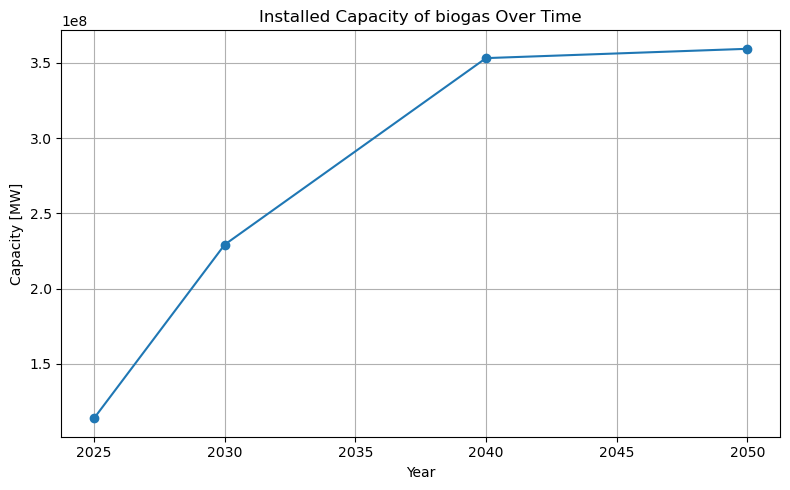

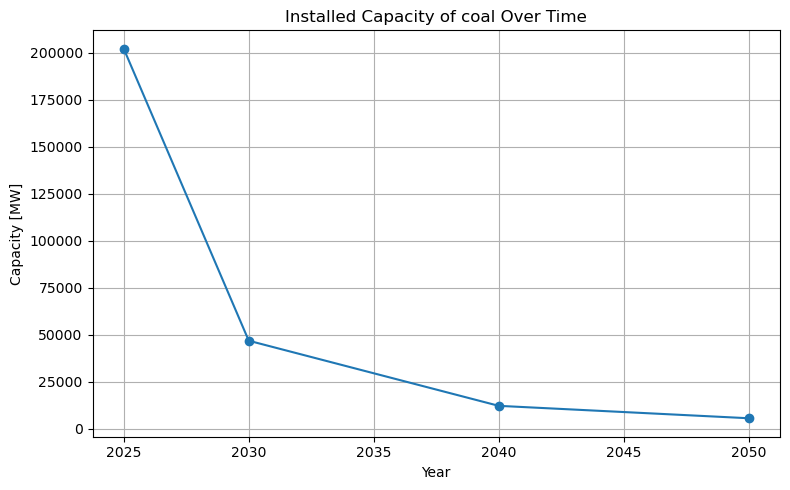

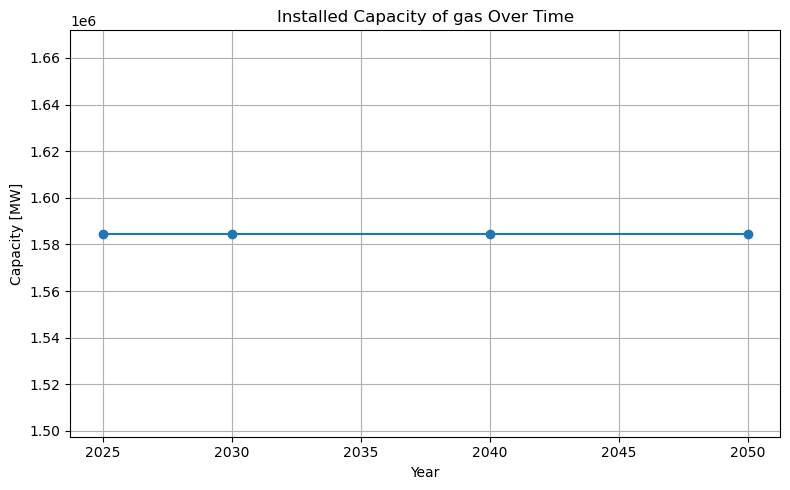

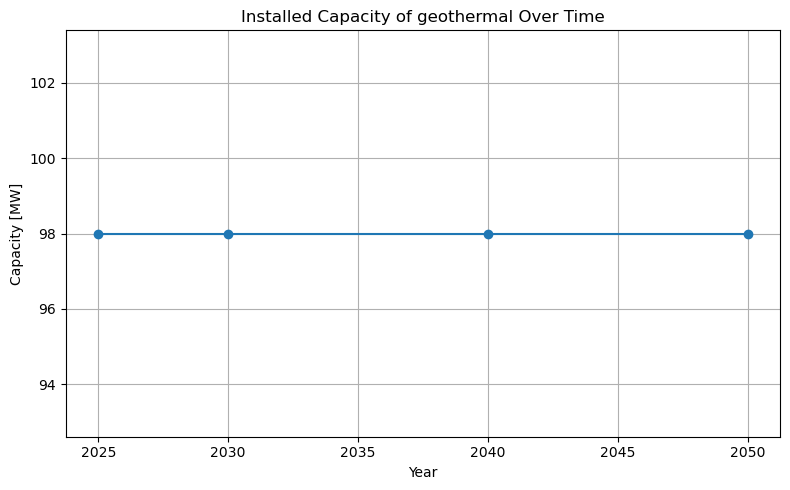

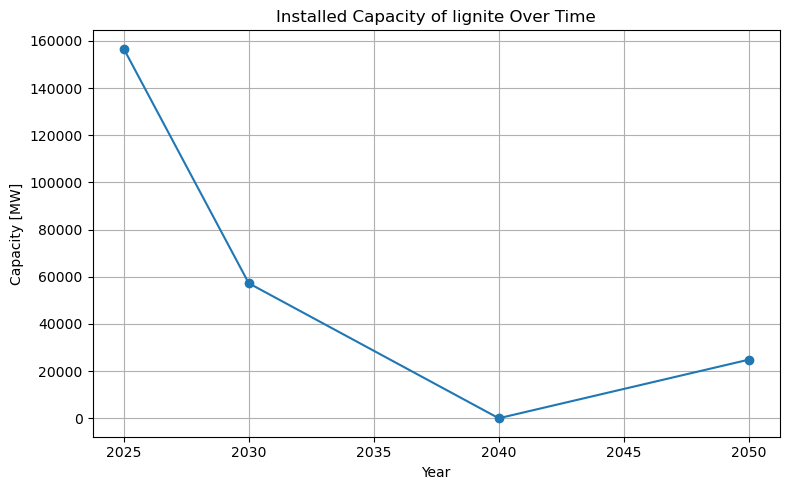

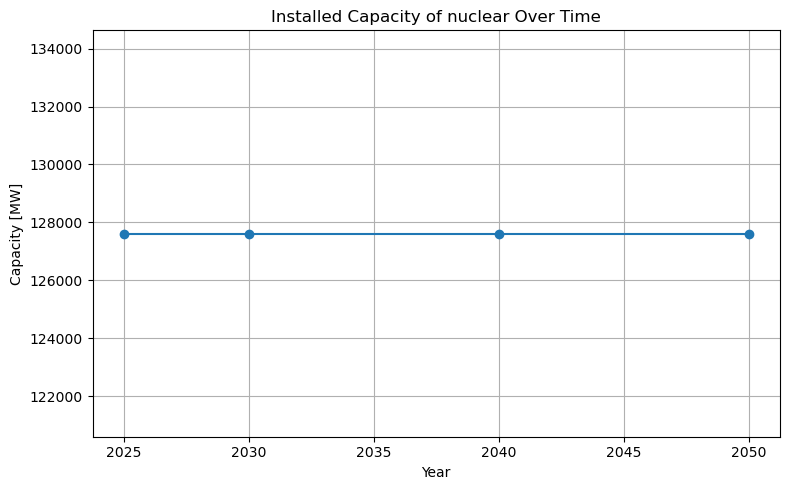

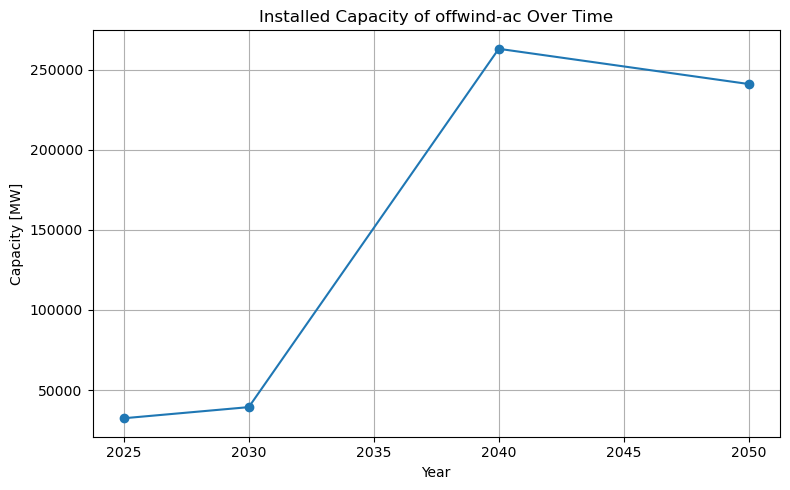

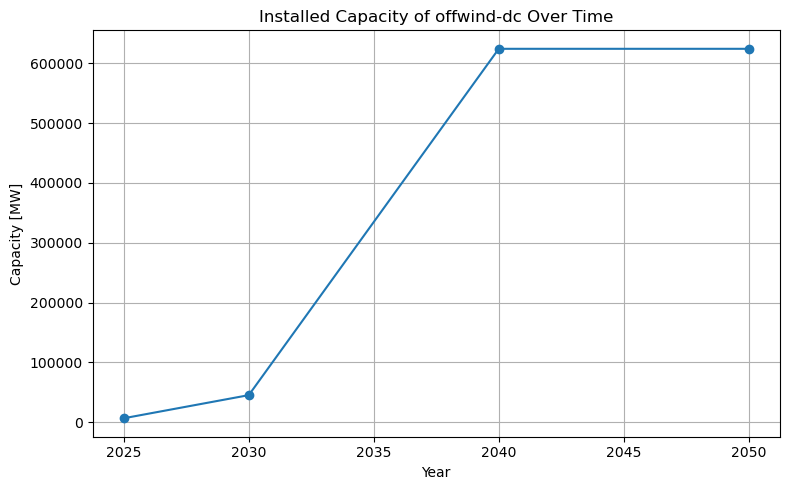

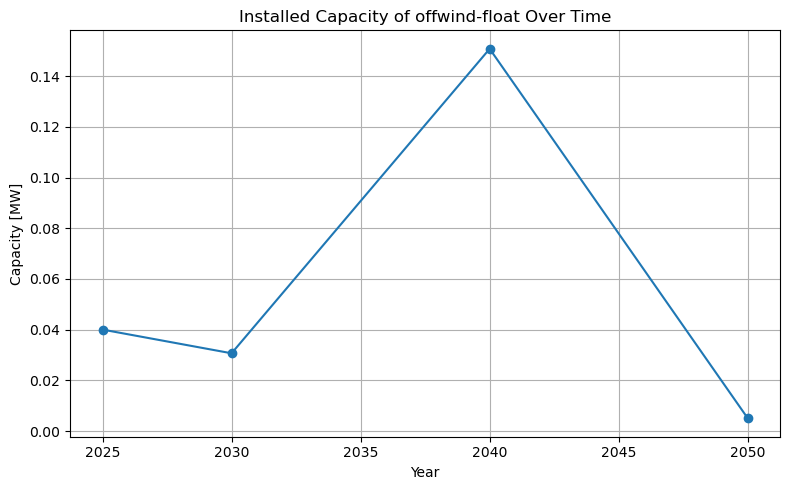

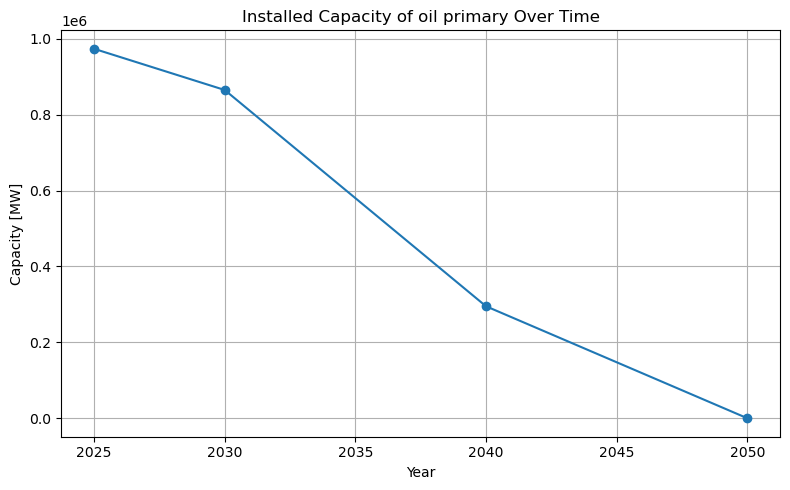

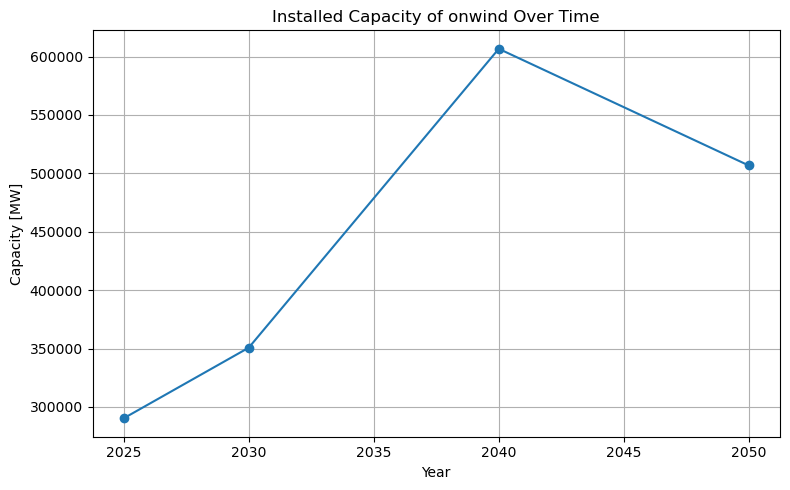

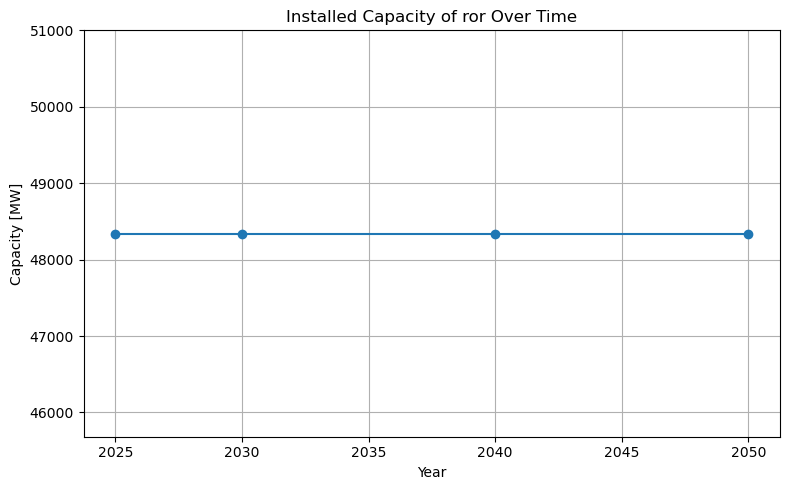

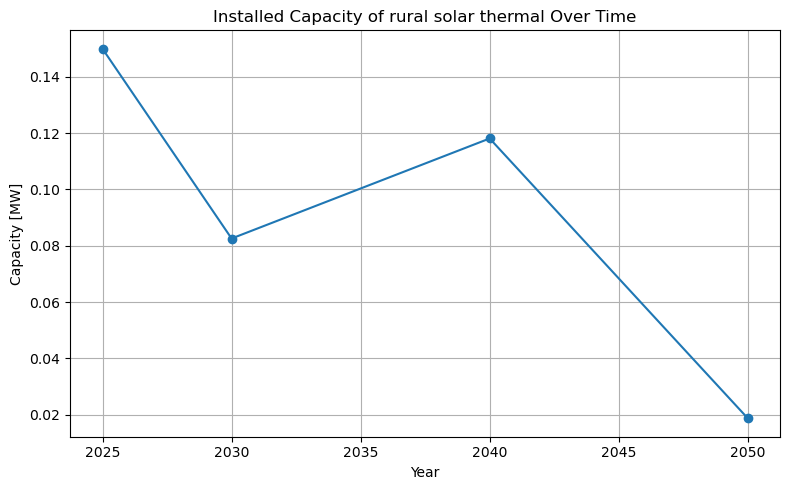

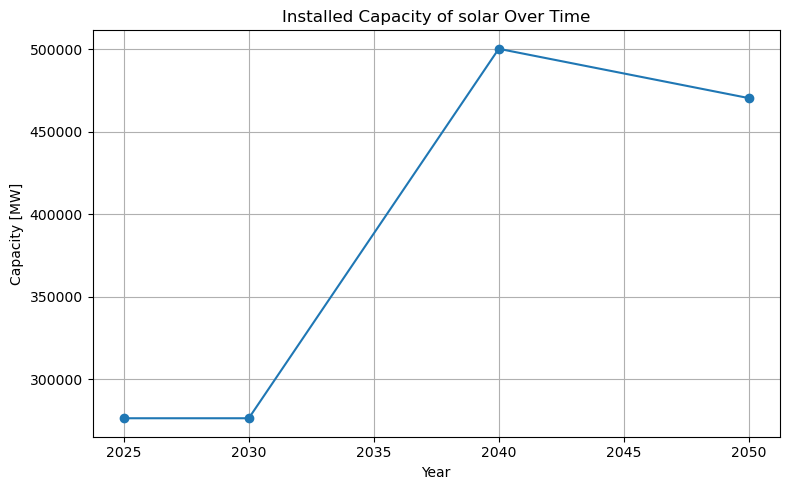

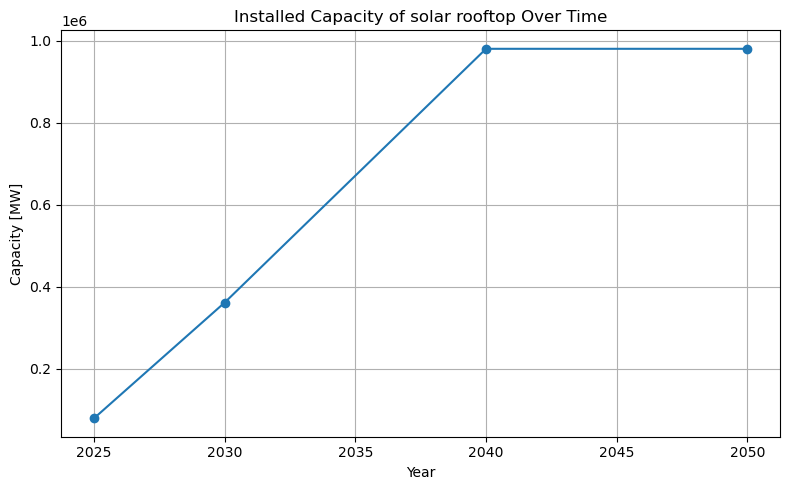

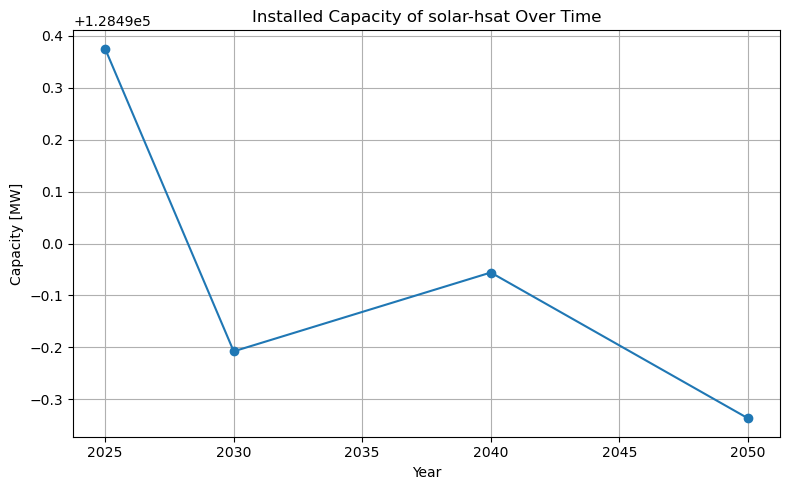

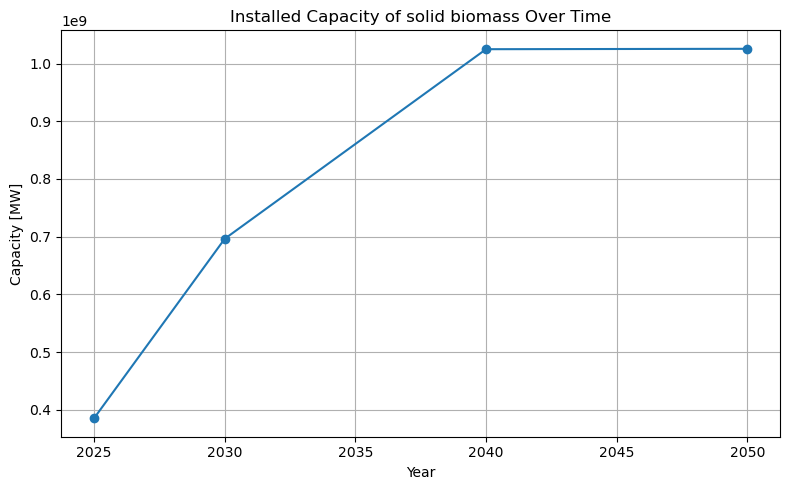

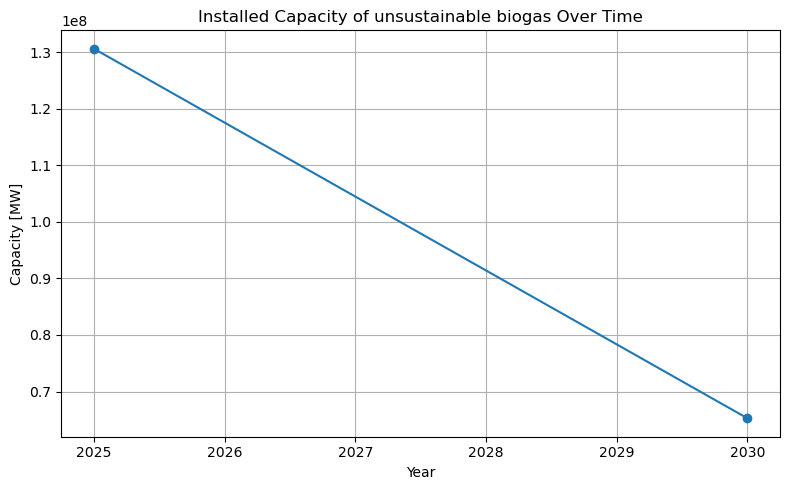

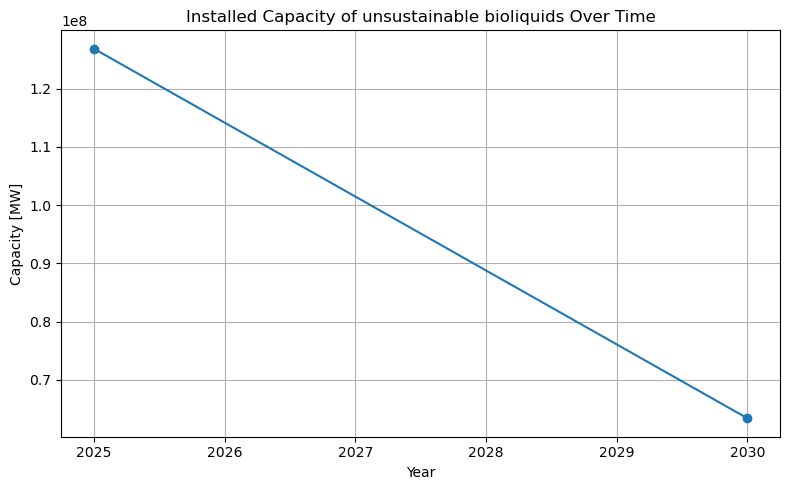

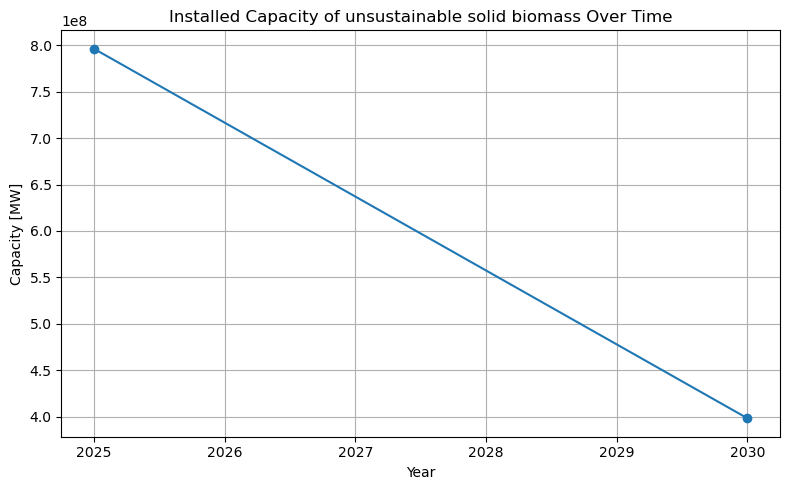

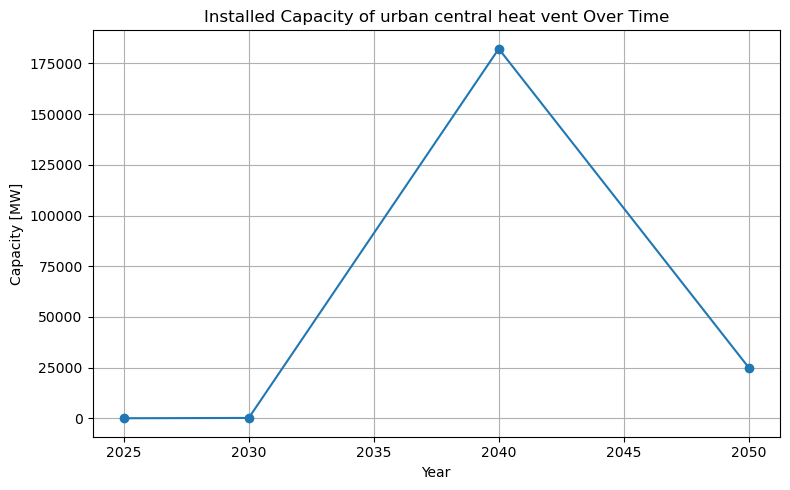

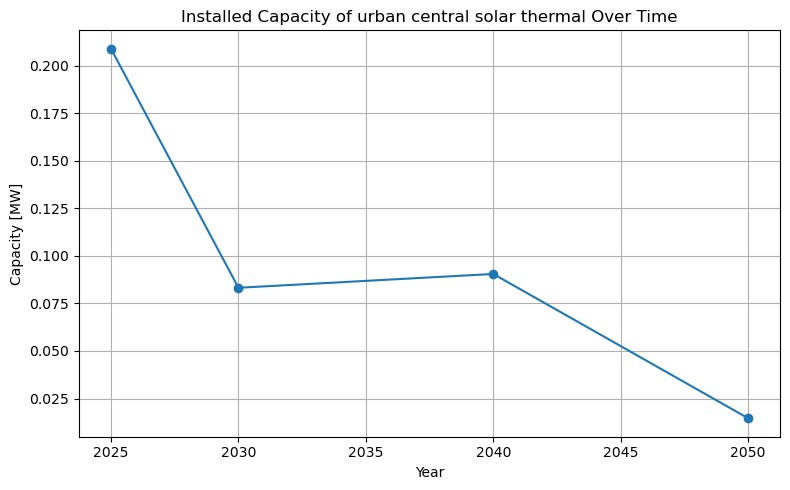

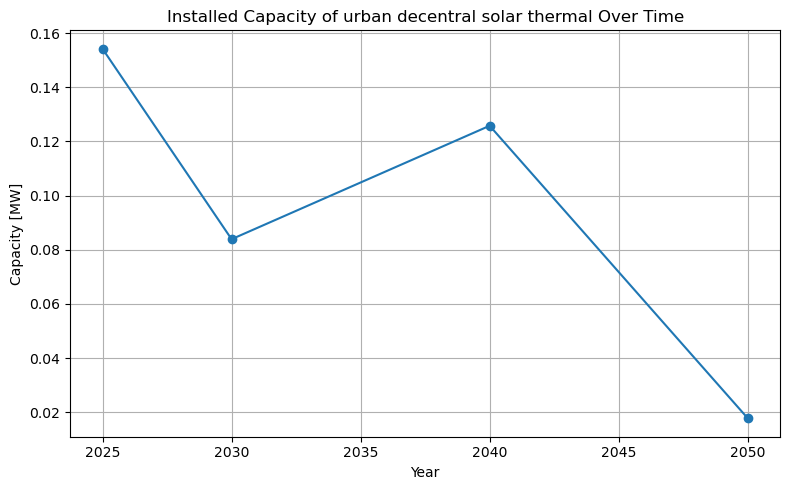

In [13]:
# Dictionary of your preloaded networks
networks = {
    2025: n_2025,
    2030: n_2030,
    2040: n_2040,
    2050: n_2050,
}

# Dictionary to collect capacities per technology per year
capacity_by_tech = {}

for year, n in networks.items():
    # Group generator capacities by carrier (technology)
    cap = n.generators.groupby("carrier")["p_nom_opt"].sum()
    for tech, value in cap.items():
        if tech not in capacity_by_tech:
            capacity_by_tech[tech] = {}
        capacity_by_tech[tech][year] = value

# Convert to DataFrame: rows = years, columns = technologies
capacity_df = pd.DataFrame(capacity_by_tech).sort_index()

# Plot one line graph per technology
for tech in capacity_df.columns:
    plt.figure(figsize=(8, 5))
    plt.plot(capacity_df.index, capacity_df[tech], marker='o', linestyle='-')
    plt.title(f"Installed Capacity of {tech} Over Time")
    plt.xlabel("Year")
    plt.ylabel("Capacity [MW]")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"capacity_{tech}.png")  # Optional: Save as image
    plt.show()

In [35]:
n_2050.statistics()

Optimal Capacity  Installed Capacity  \
Generator Offshore Wind (AC)            2.410675e+05        241067.48093   
          Offshore Wind (DC)            6.243840e+05        624384.02127   
          Offshore Wind (Floating)      5.090000e-03             0.00000   
          Onshore Wind                  5.067515e+05        506751.52800   
          Run of River                  4.834167e+04         48341.66702   
...                                              ...                 ...   
Store     home battery                  1.925127e+05        169730.85400   
          lignite                       5.912433e+08             0.00000   
          methanol                      2.794273e+06             0.00000   
          oil                           2.168115e+07             0.00000   
          uranium                       1.212600e-01             0.00000   

                                          Supply    Withdrawal  \
Generator Offshore Wind (AC)        1.102014e+09  0.000000e+00   
          Offshore Wind (DC)        3.052325e+09  0.000000e+00   
          Offshore Wind (Floating)  1.019751e+01  0.000000e+00   
          Onshore Wind              1.497295e+09  0.000000e+00   
          Run of River              1.543706e+08  0.000000e+00   
...                                          ...           ...   
Store     home battery              5.260253e+07  5.260253e+07   
          lignite                   2.362866e+04  2.362866e+04   
          methanol                  3.733035e+06  3.733035e+06   
          oil                       6.067535e+07  6.067535e+07   
          uranium                   1.245000e-02  1.245000e-02   

                                    Energy Balance  Transmission  \
Generator Offshore Wind (AC)          1.102014e+09           0.0   
          Offshore Wind (DC)          3.052325e+09           0.0   
          Offshore Wind (Floating)    1.019751e+01           0.0   
          Onshore Wind                1.497295e+09           0.0   
          Run of River                1.543706e+08           0.0   
...                                            ...           ...   
Store     home battery                1.000000e-05           0.0   
          lignite                     0.000000e+00           0.0   
          methanol                    0.000000e+00           0.0   
          oil                         0.000000e+00           0.0   
          uranium                     0.000000e+00           0.0   

                                    Capacity Factor   Curtailment  \
Generator Offshore Wind (AC)               0.521849  1.753627e+07   
          Offshore Wind (DC)               0.558052  3.922177e+06   
          Offshore Wind (Floating)         0.227898  7.023660e+00   
          Onshore Wind                     0.337294  3.325364e+07   
          Run of River                     0.364535  9.797938e+03   
...                                             ...           ...   
Store     home battery                     0.498968  0.000000e+00   
          lignite                          0.999998  0.000000e+00   
          methanol                         0.549820  0.000000e+00   
          oil                              0.537646  0.000000e+00   
          uranium                          0.051295  0.000000e+00   

                                    Capital Expenditure  \
Generator Offshore Wind (AC)               4.660388e+10   
          Offshore Wind (DC)               1.397083e+11   
          Offshore Wind (Floating)         1.081347e+03   
          Onshore Wind                     5.731668e+10   
          Run of River                     1.489747e+10   
...                                                 ...   
Store     home battery                     2.185744e+09   
          lignite                          5.912433e+07   
          methanol                         1.572732e+07   
          oil                              5.917316e+07   
          uranium                  

                                              Optimal Capacity  \
BEV charger                                       4.818070e+05   
Combined-Cycle Gas                                3.329723e+05   
DC                                                1.456567e+05   
Fischer-Tropsch                                   9.608000e-02   
H2 Electrolysis                                   2.165000e-02   
H2 Fuel Cell                                      3.995000e-02   
H2 pipeline                                       4.080570e+01   
Open-Cycle Gas                                    5.776495e+01   
SMR                                               1.604843e+04   
SMR CC                                            1.337503e+04   
agriculture machinery oil                         1.174060e+04   
battery charger                                   3.756200e-01   
battery discharger                                3.843700e-01   
biogas to gas                                     1.490551e+04   
coal      

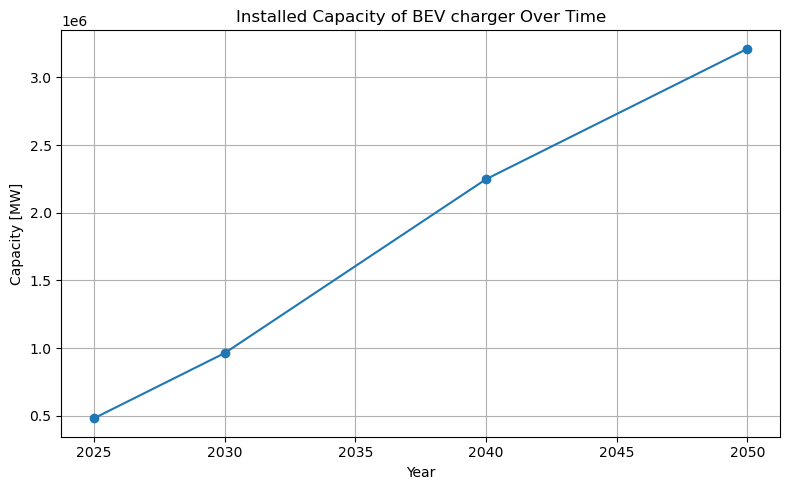

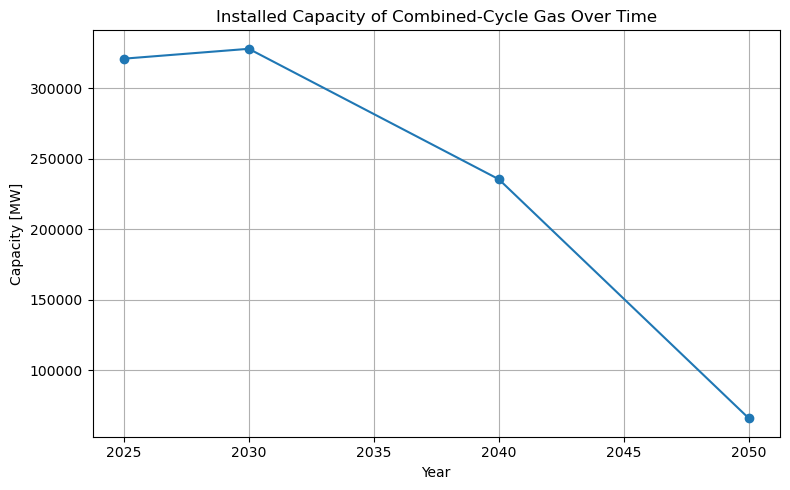

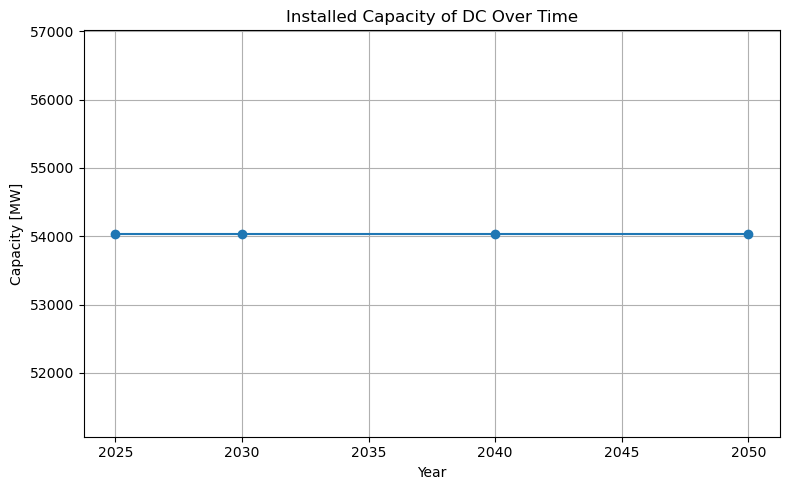

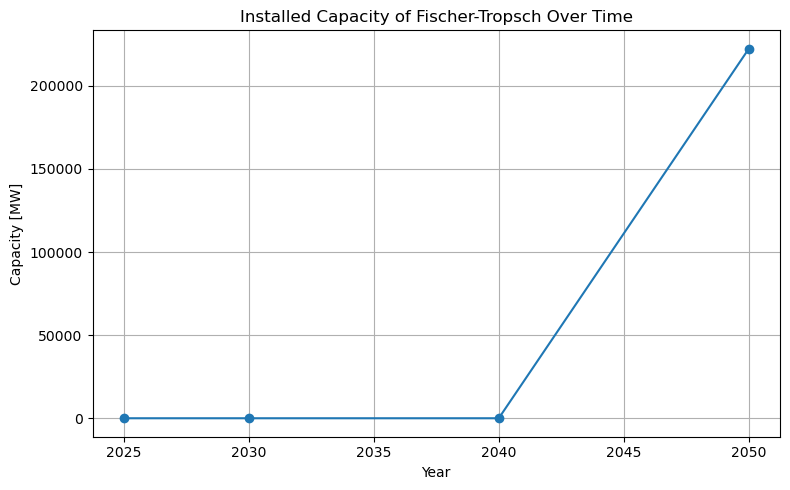

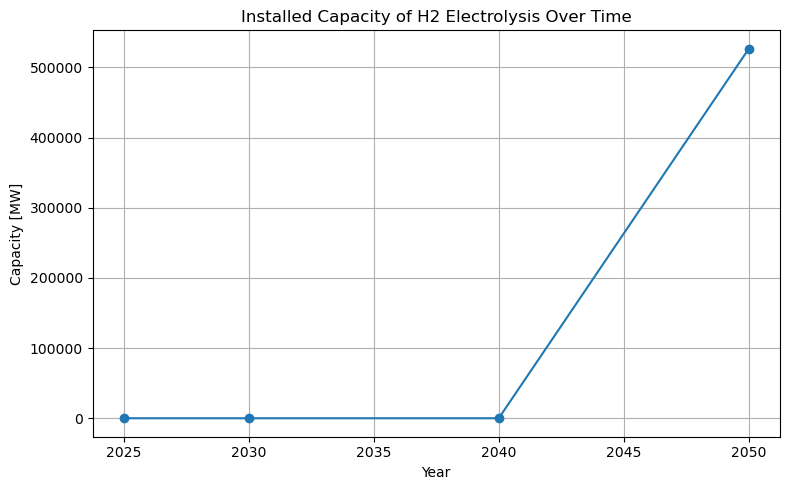

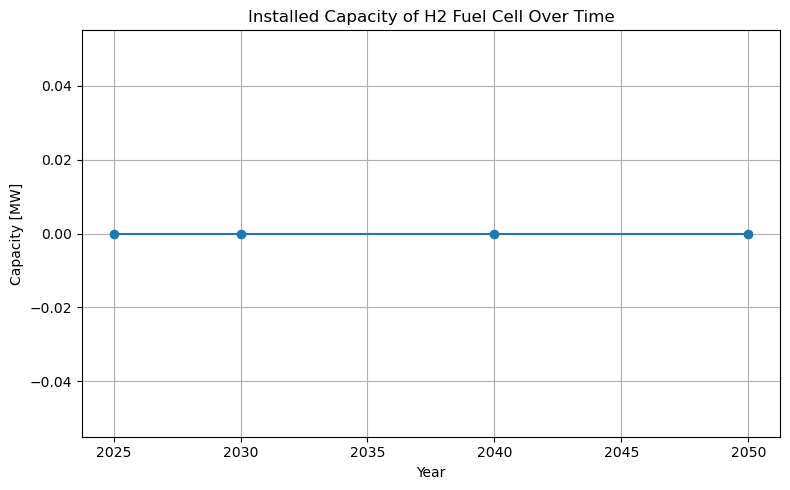

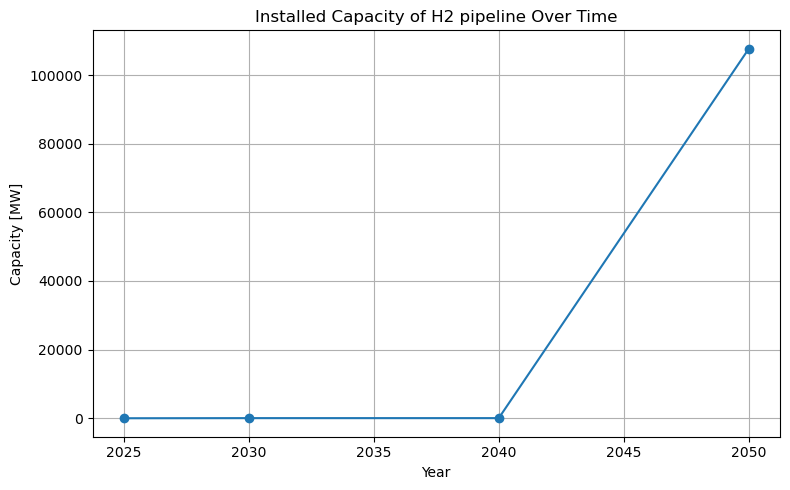

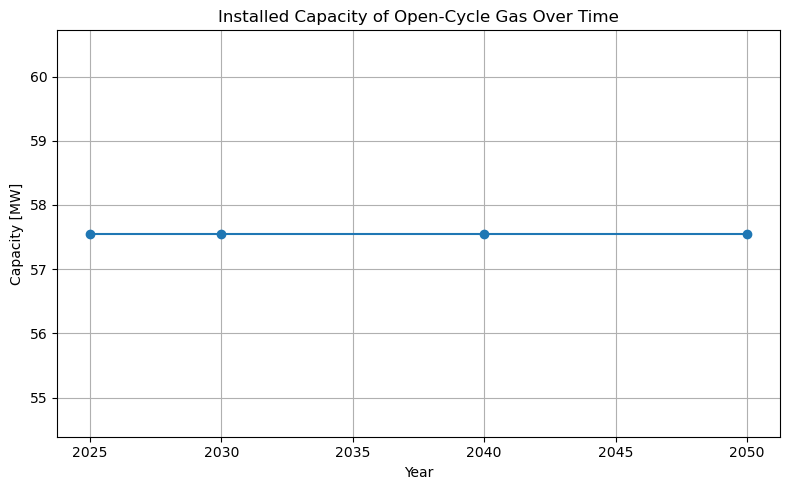

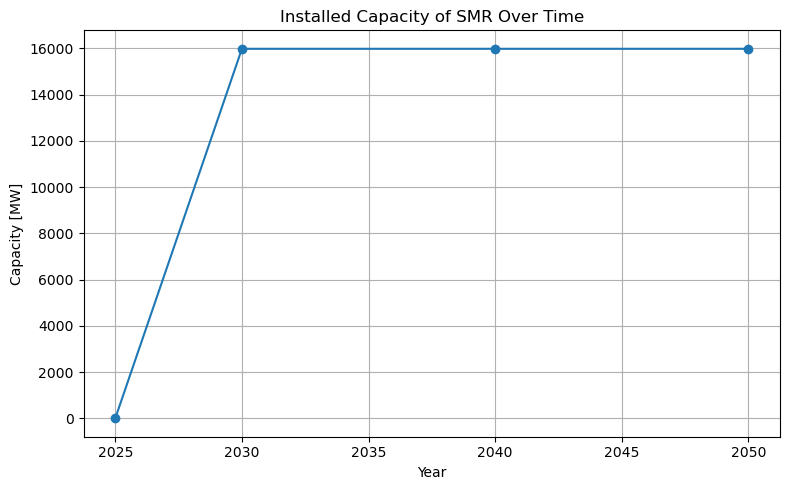

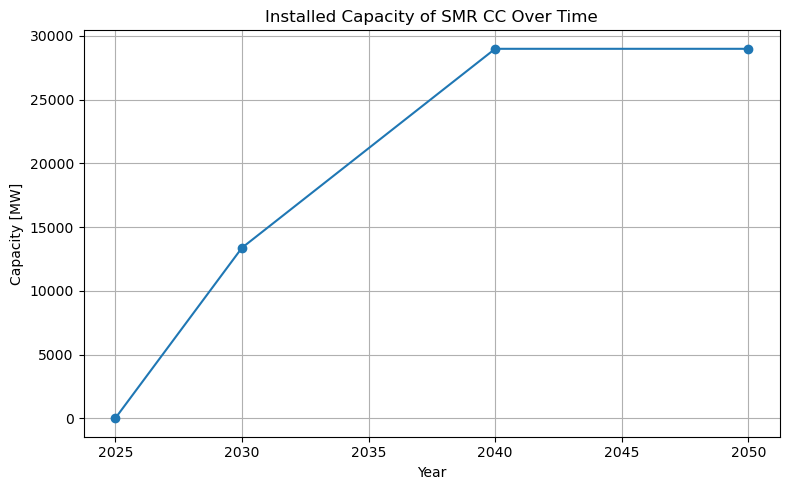

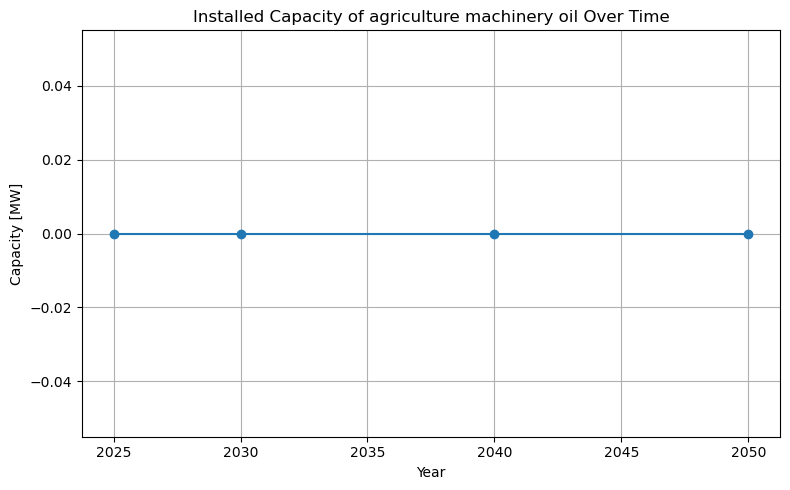

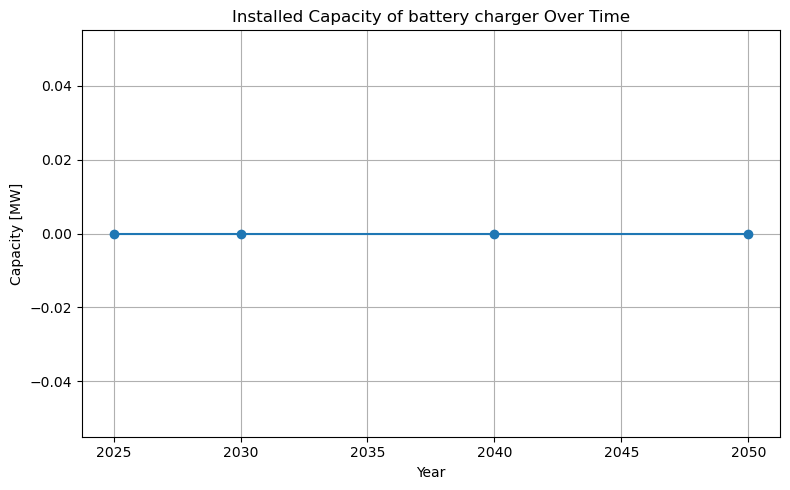

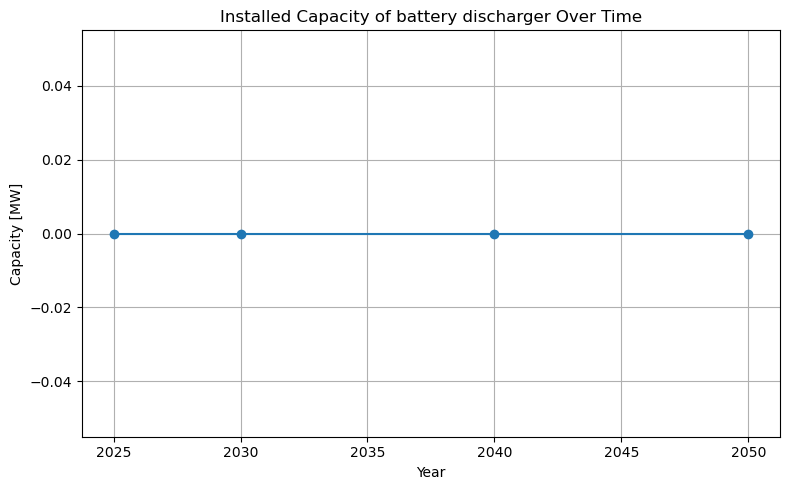

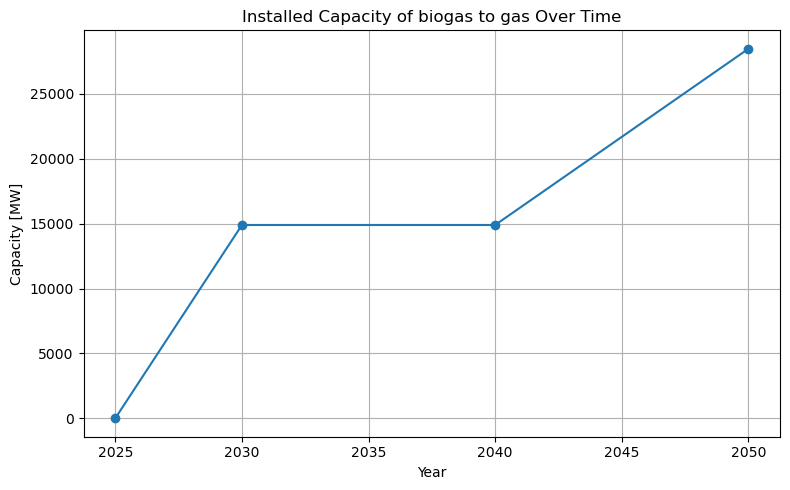

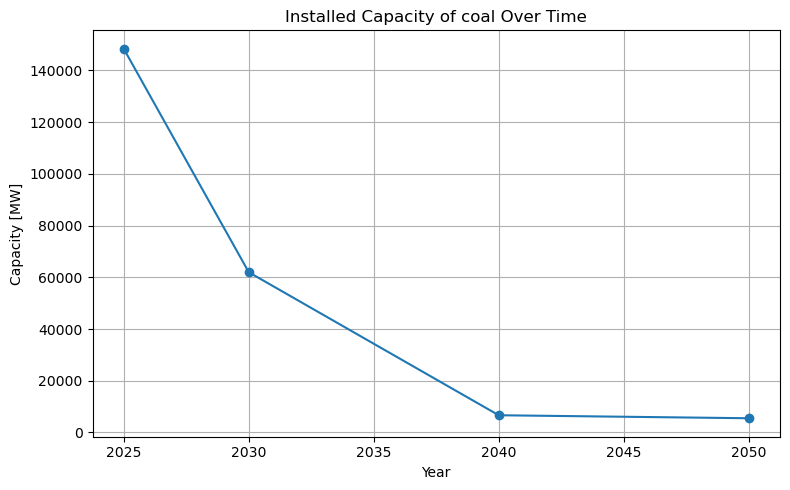

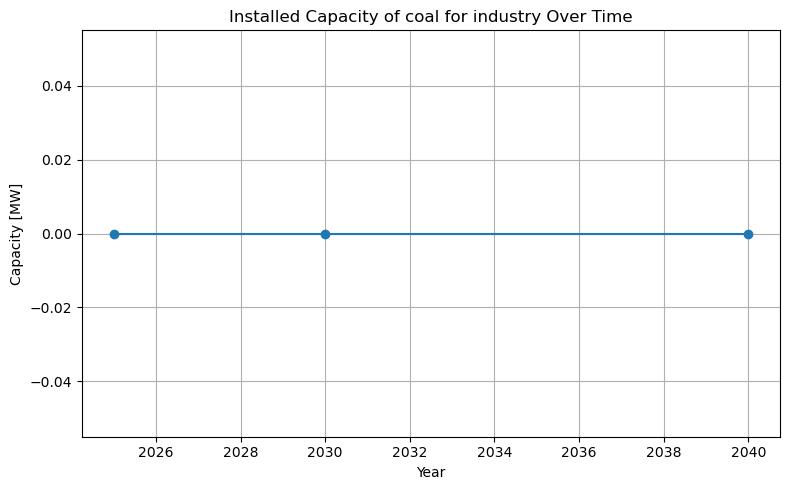

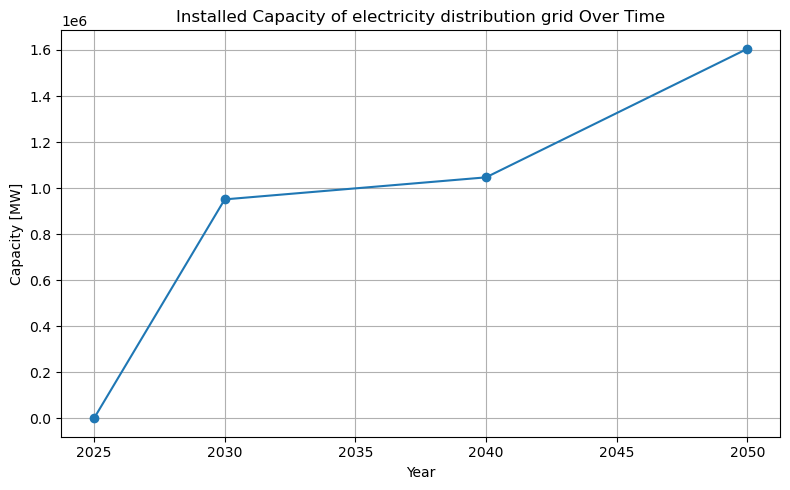

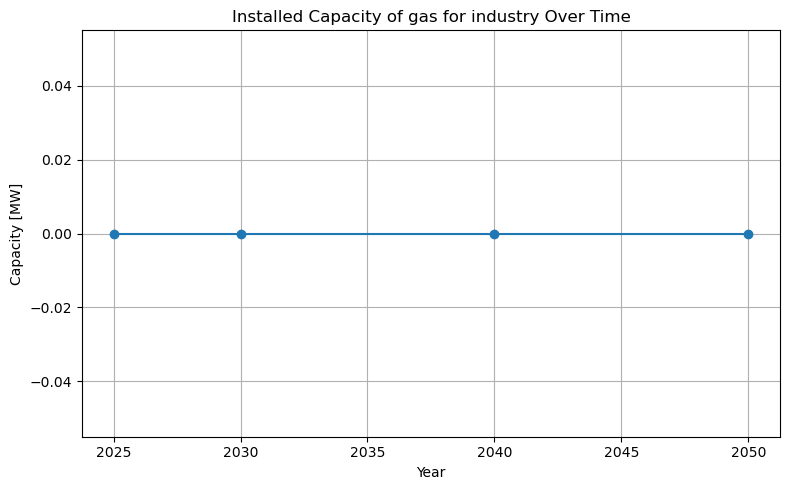

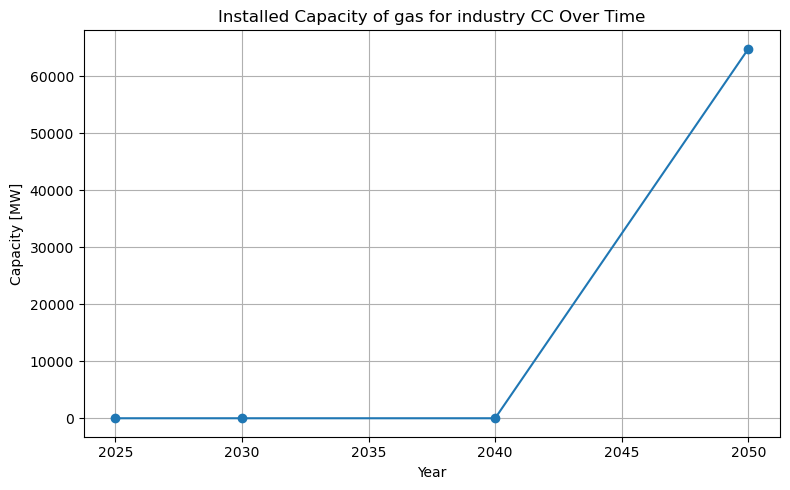

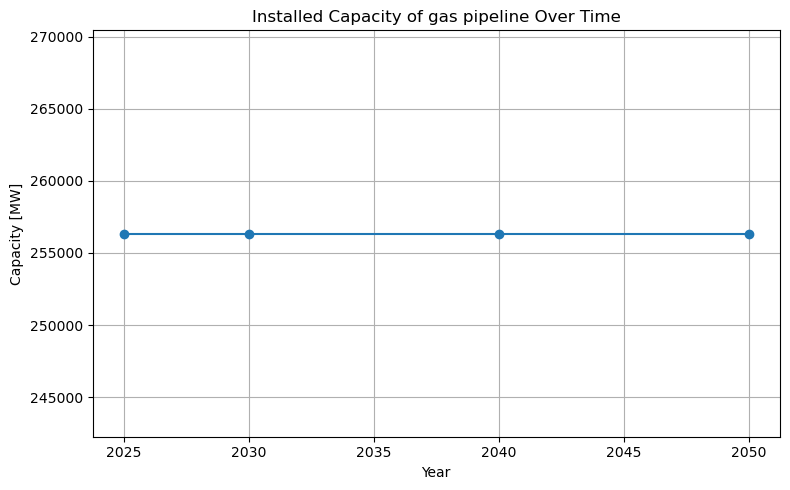

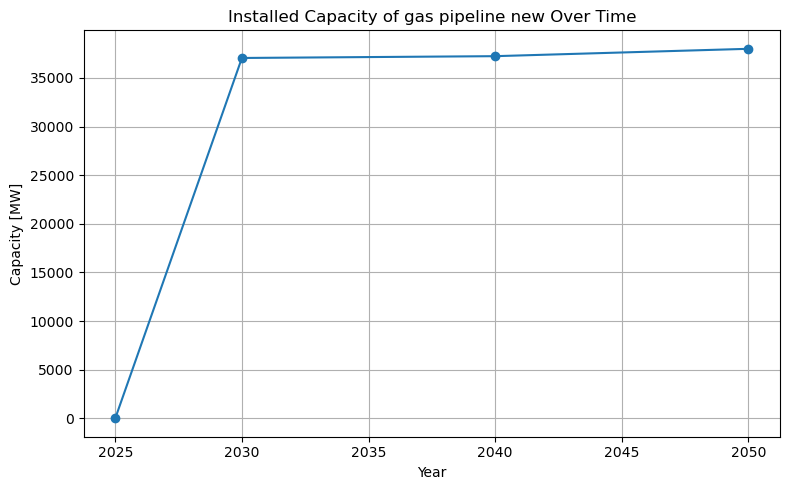

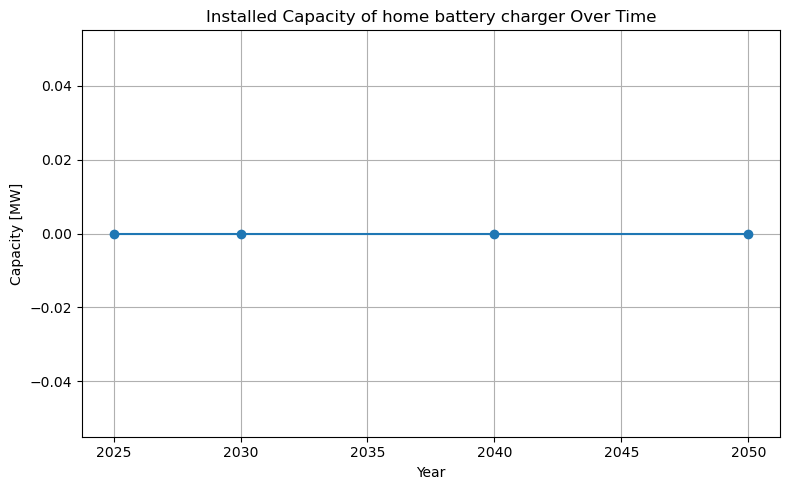

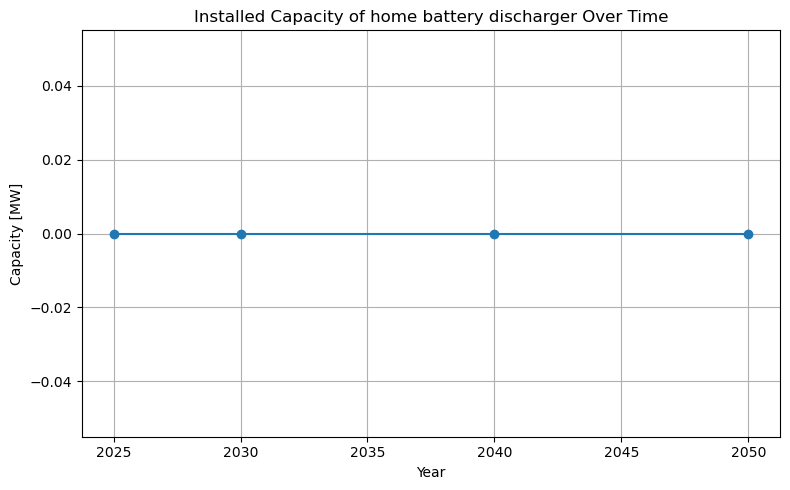

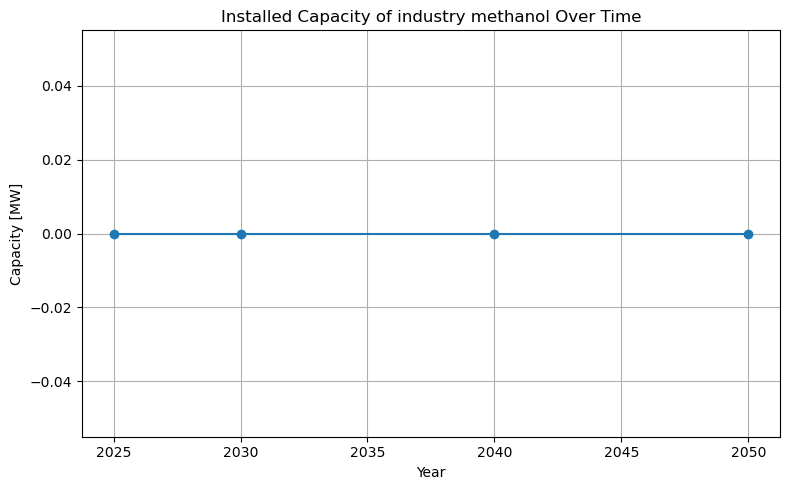

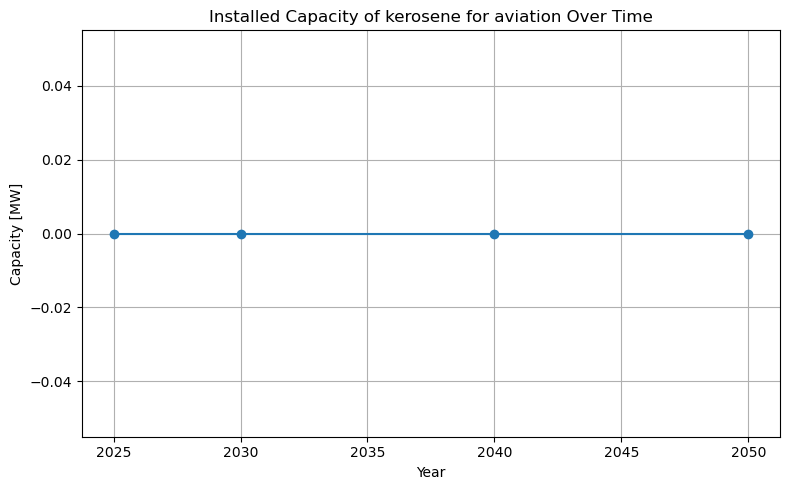

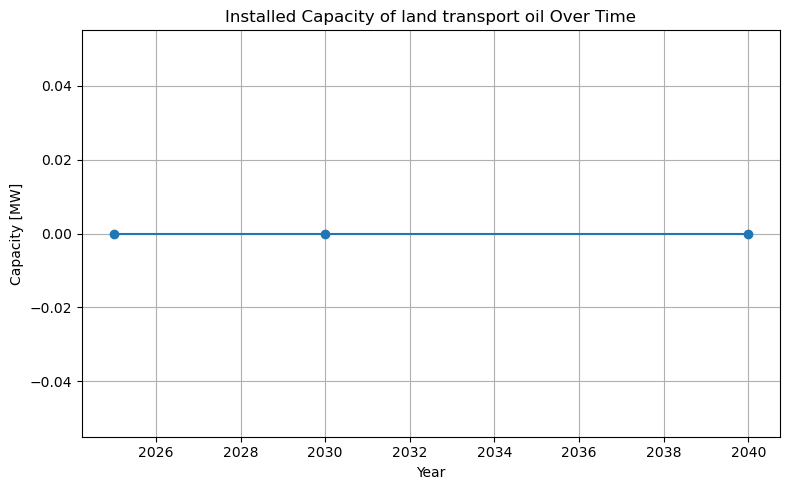

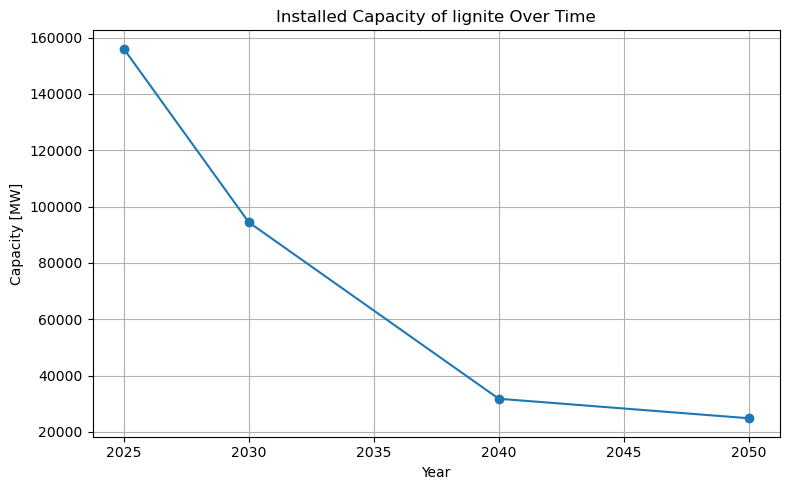

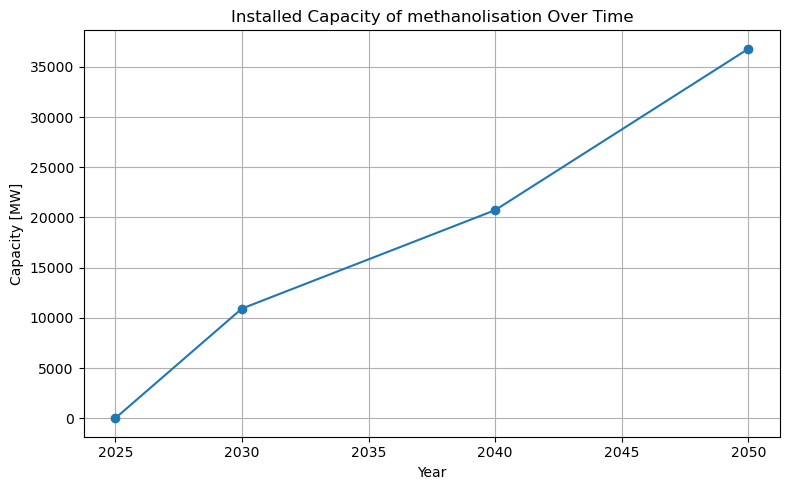

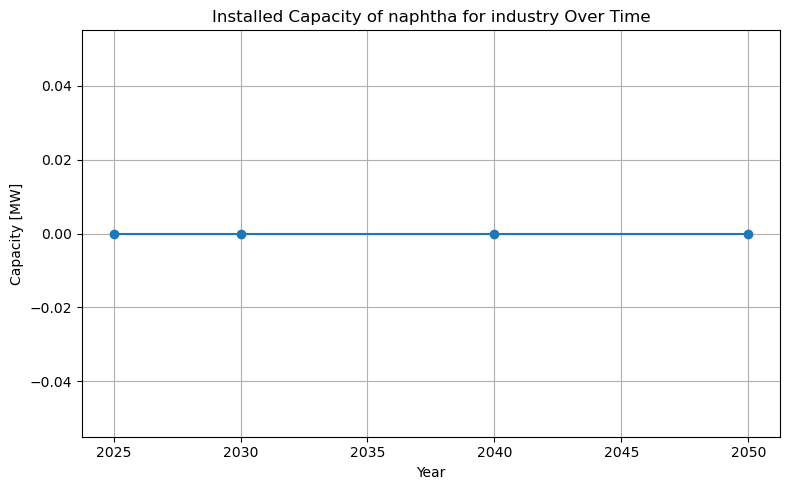

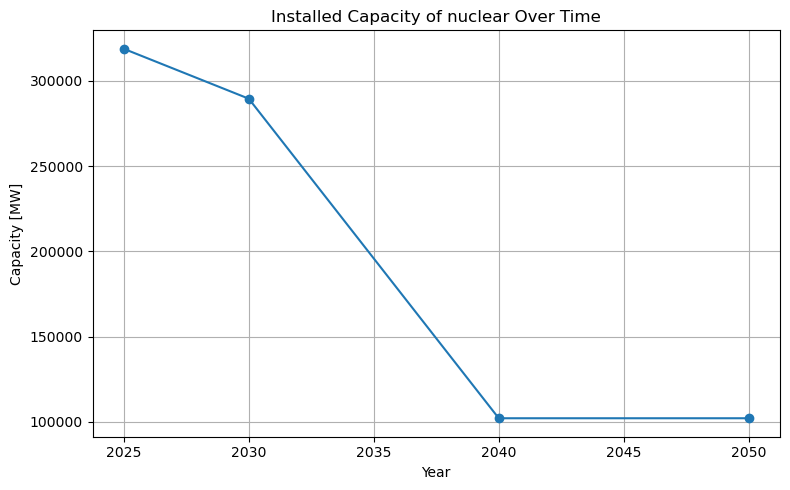

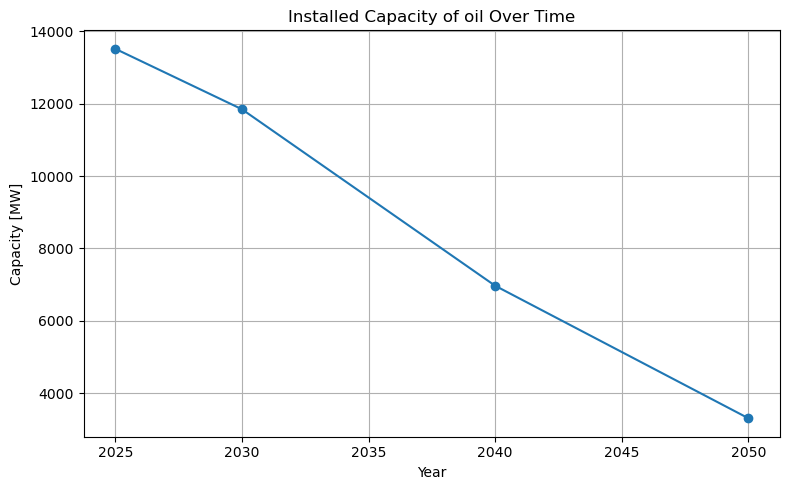

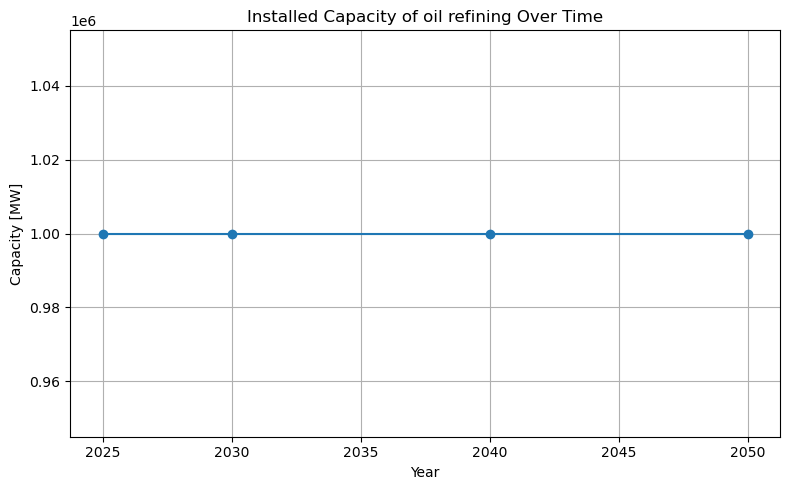

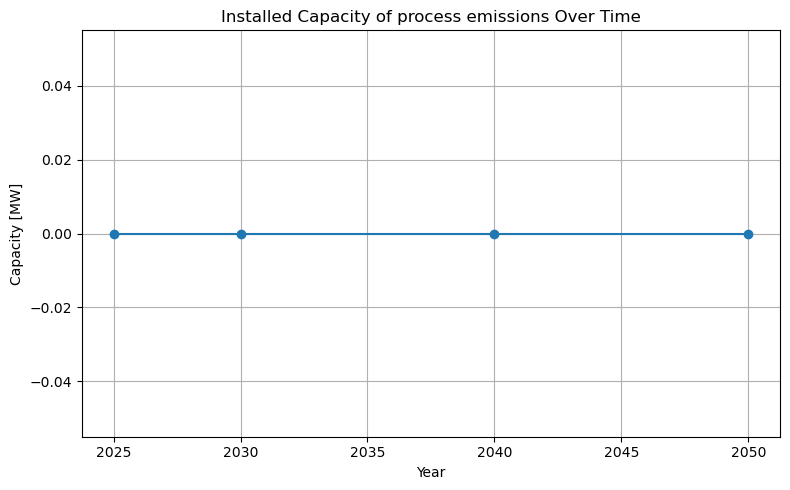

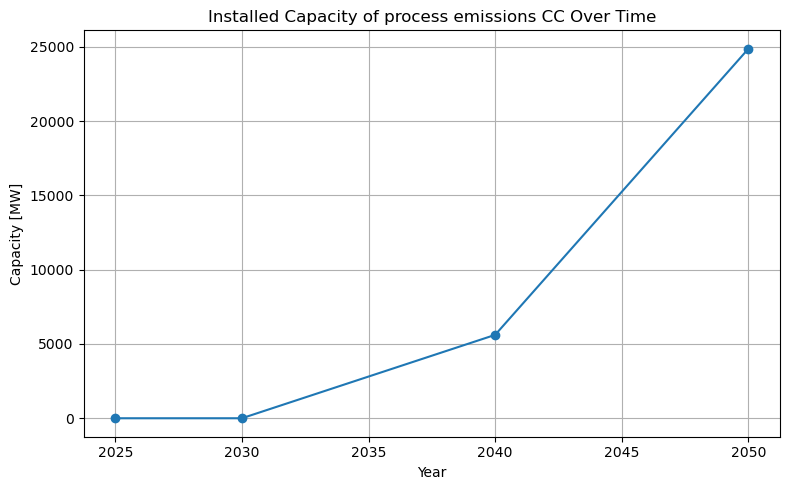

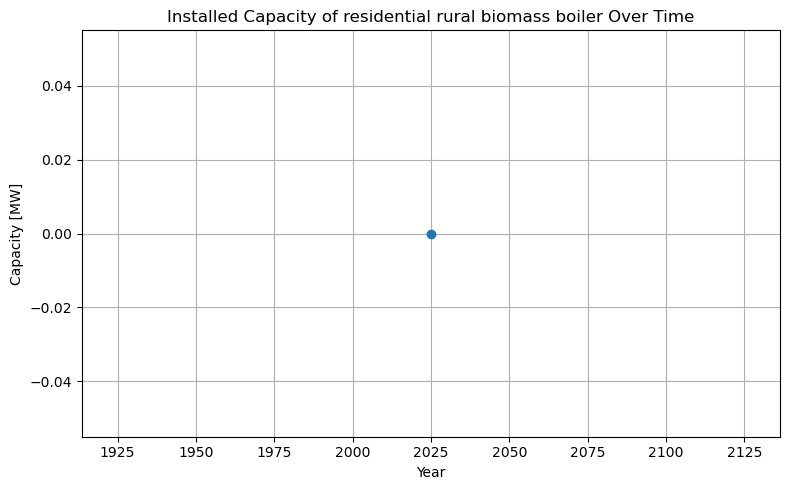

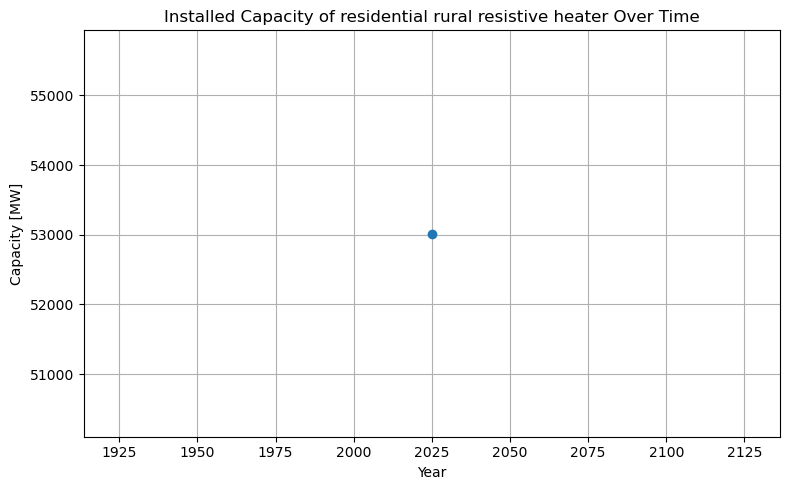

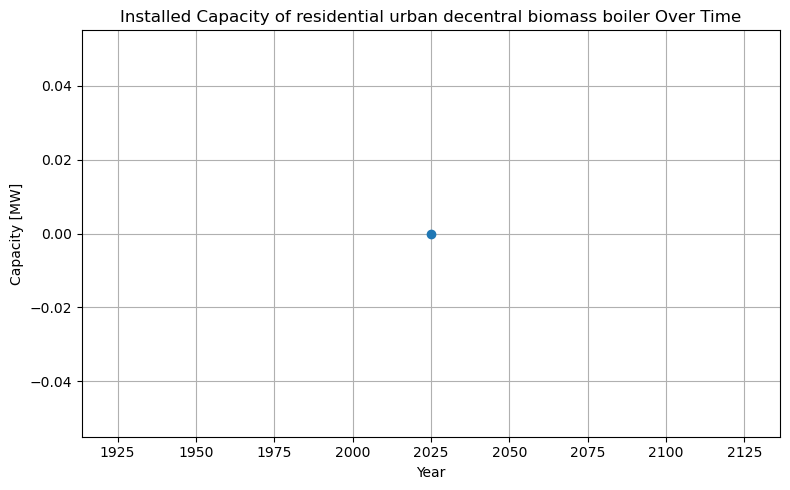

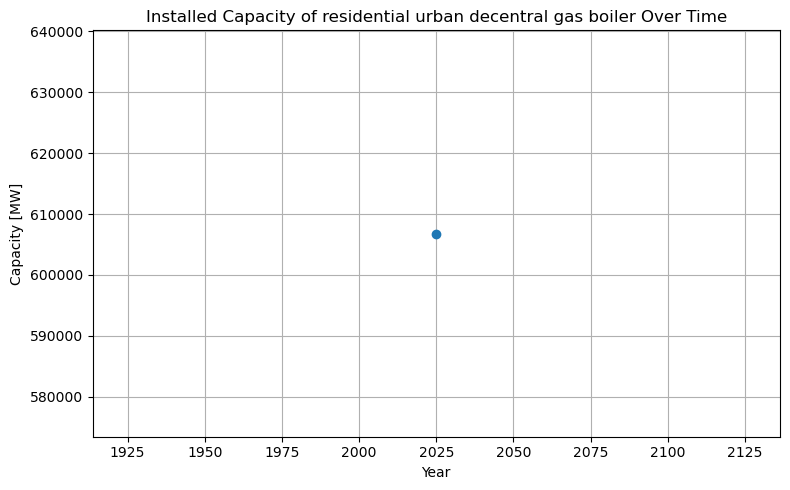

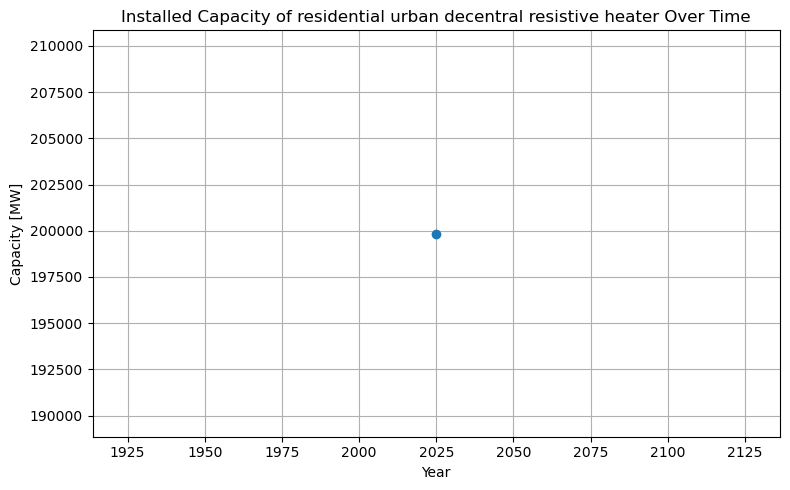

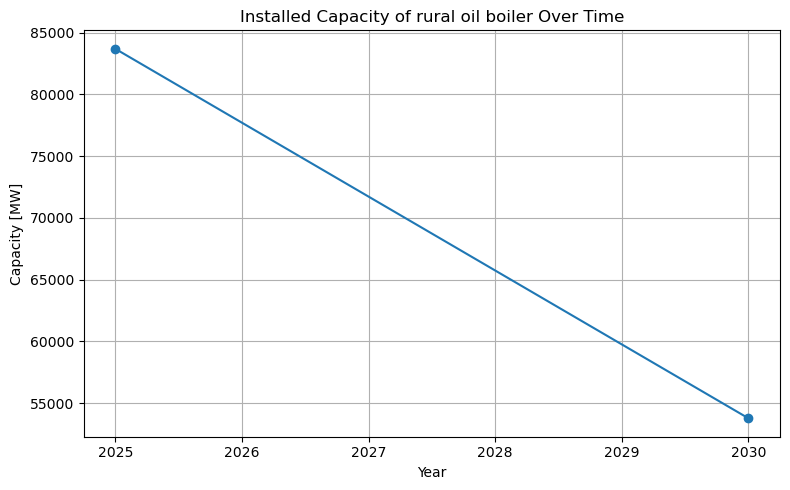

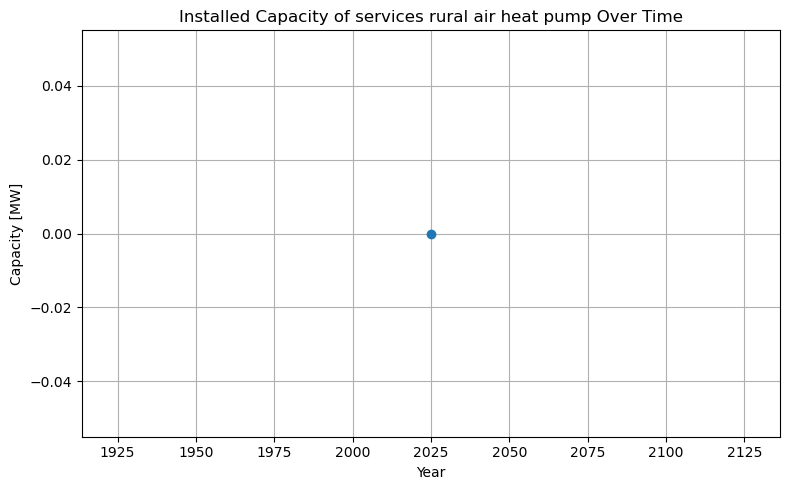

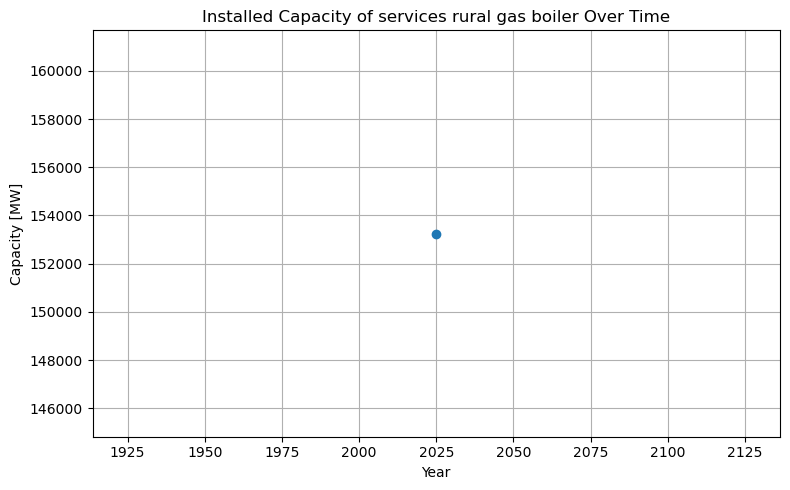

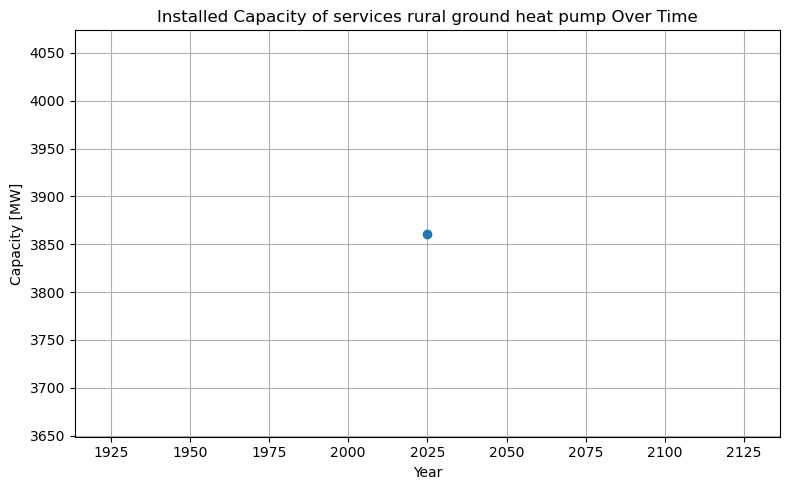

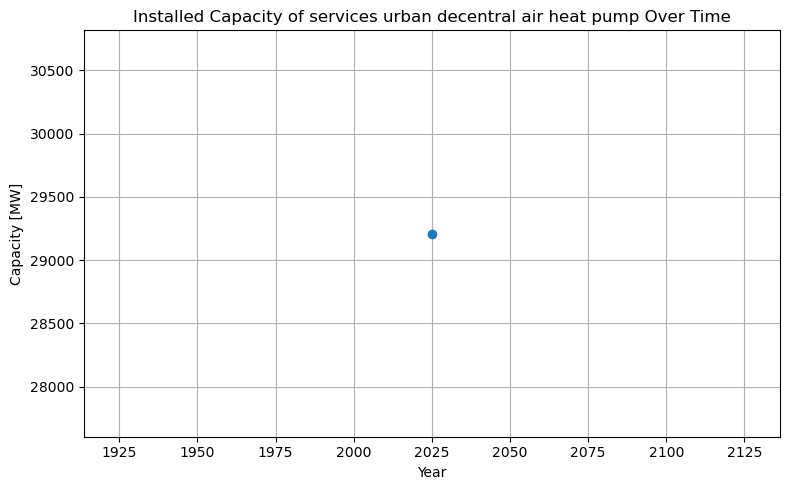

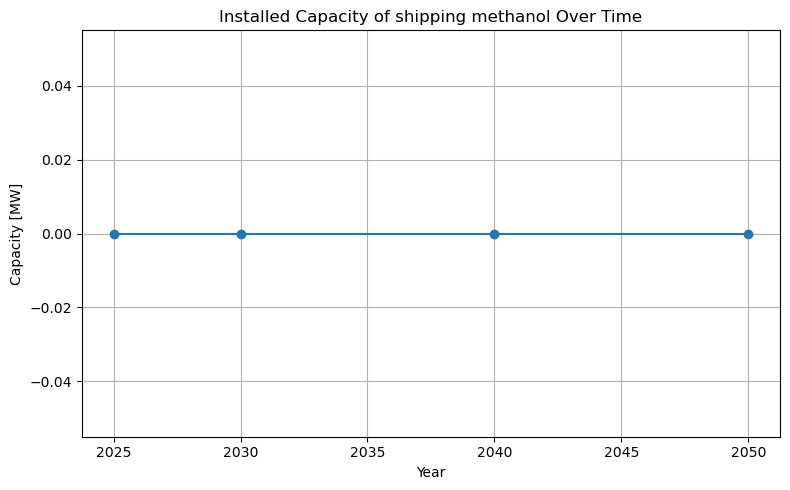

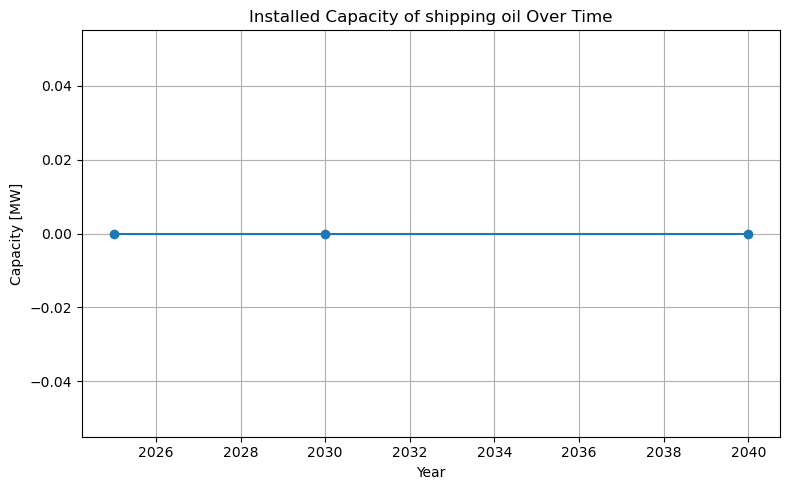

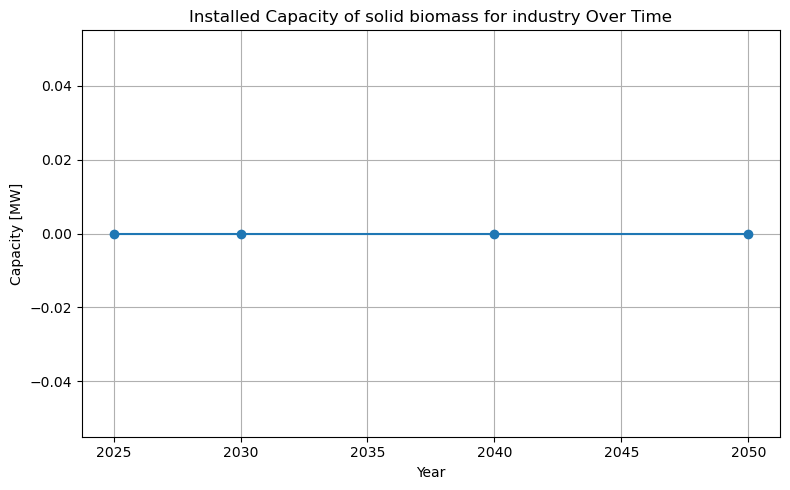

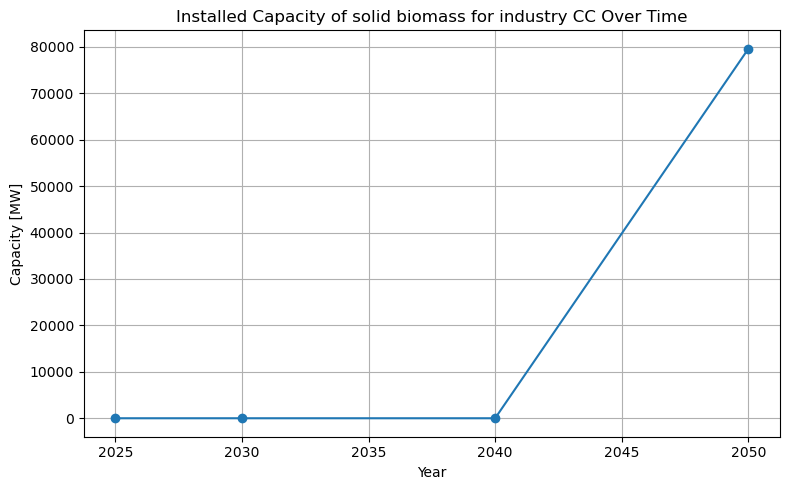

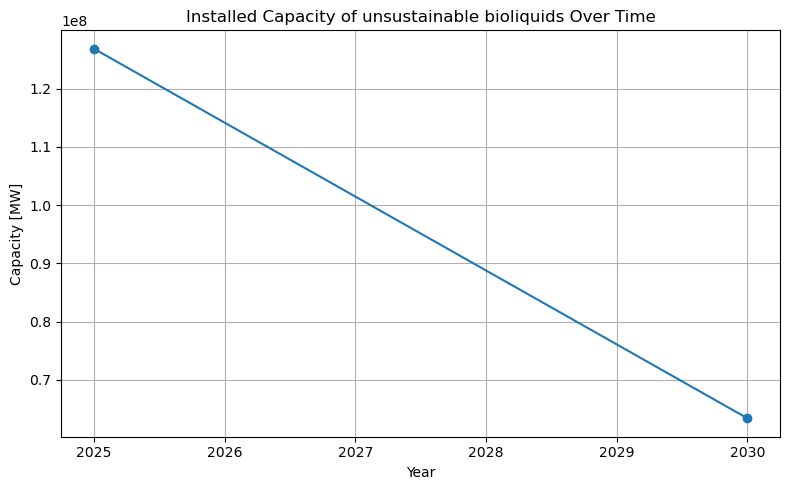

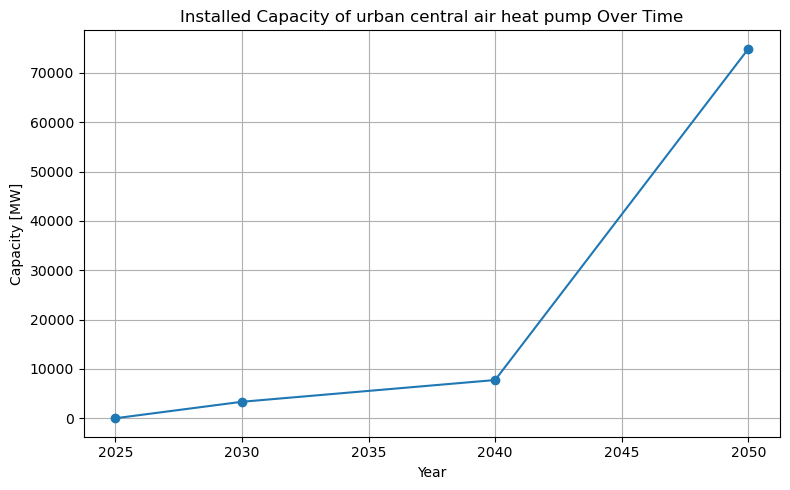

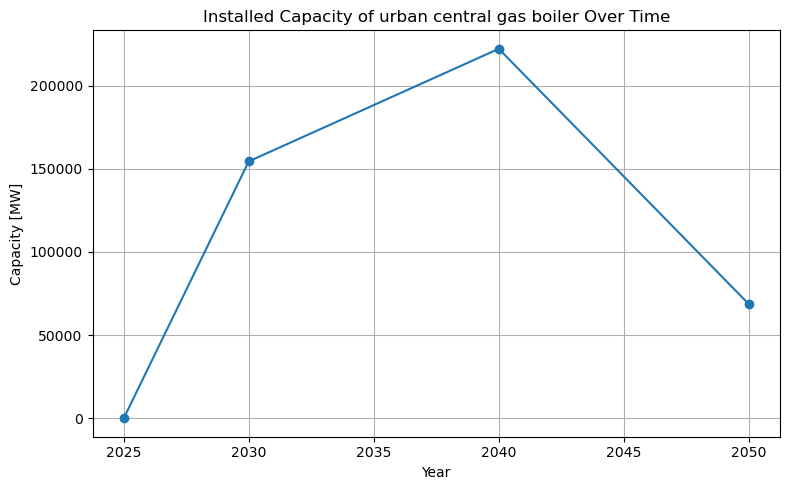

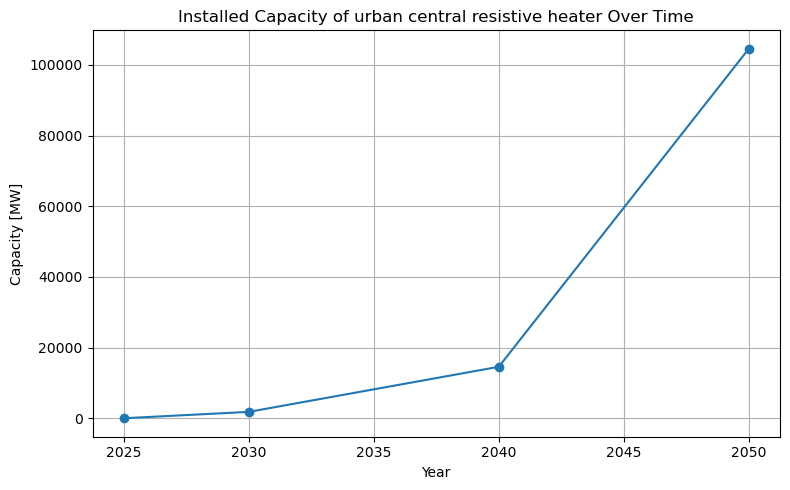

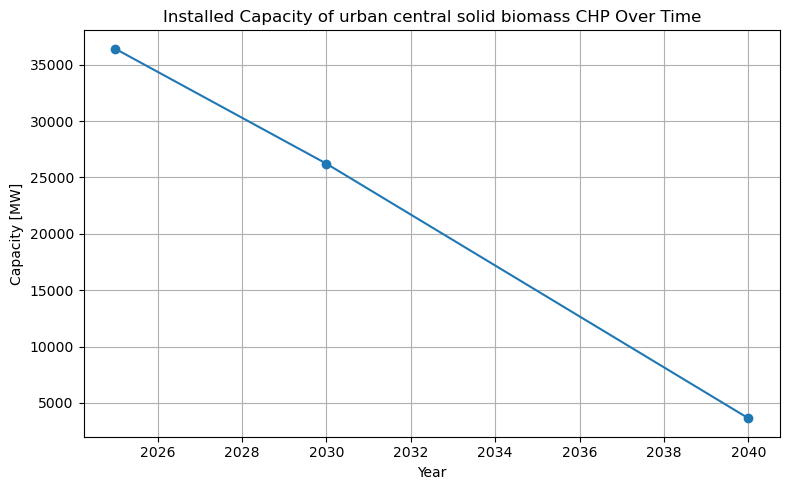

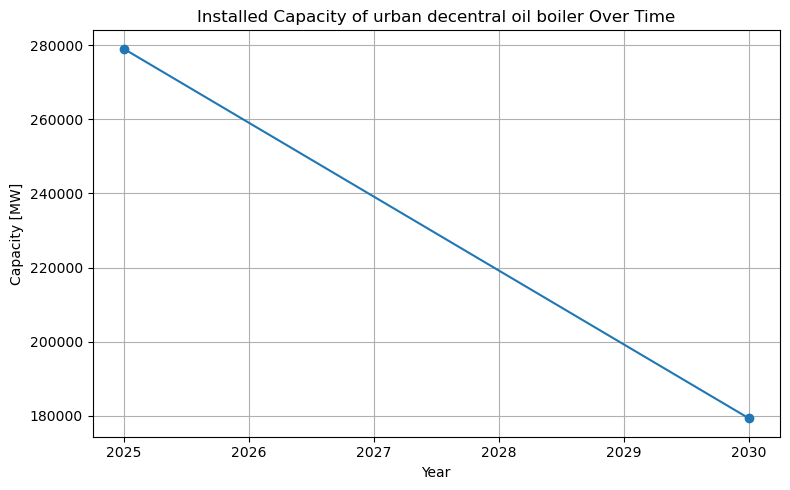

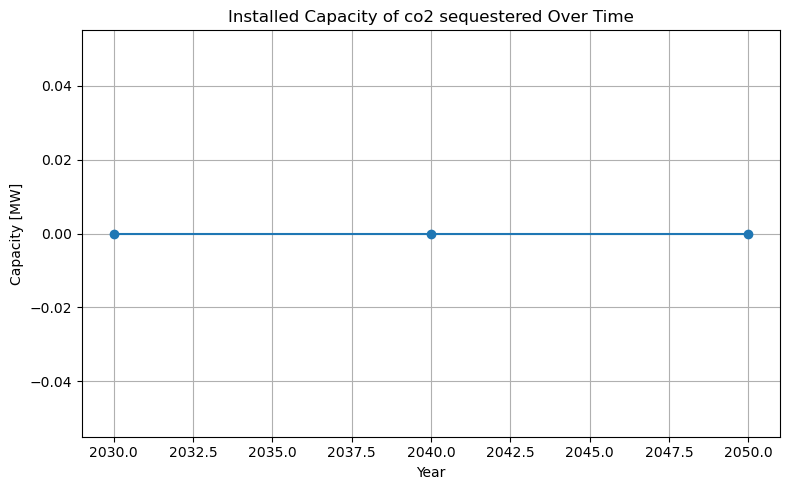

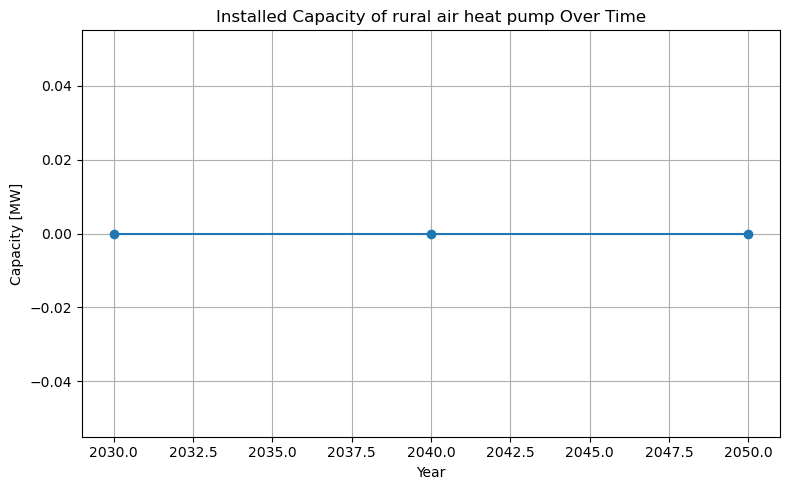

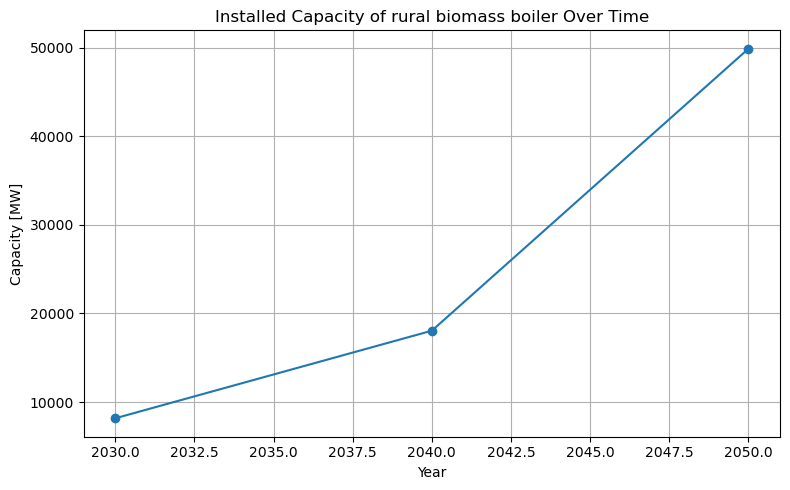

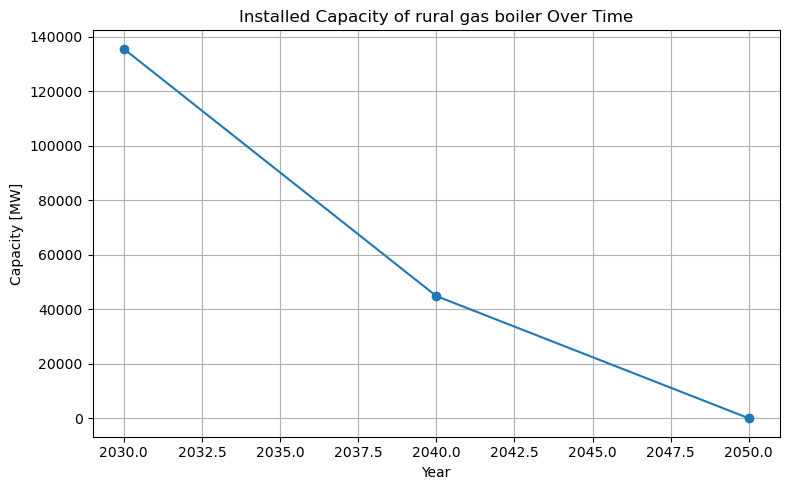

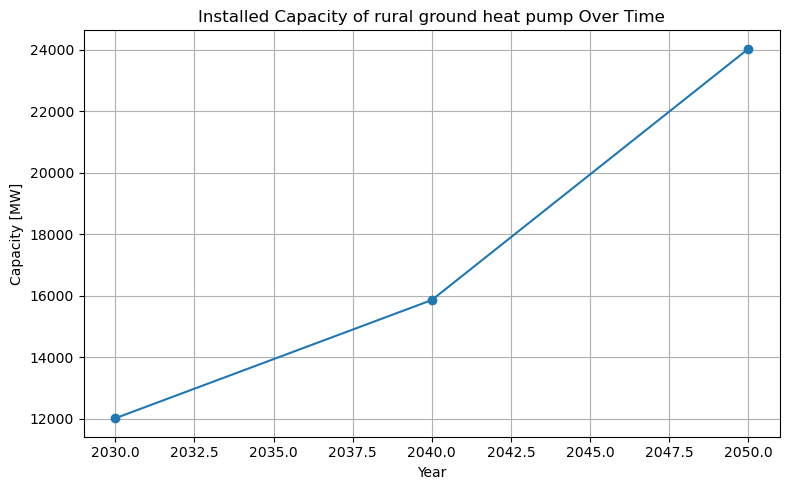

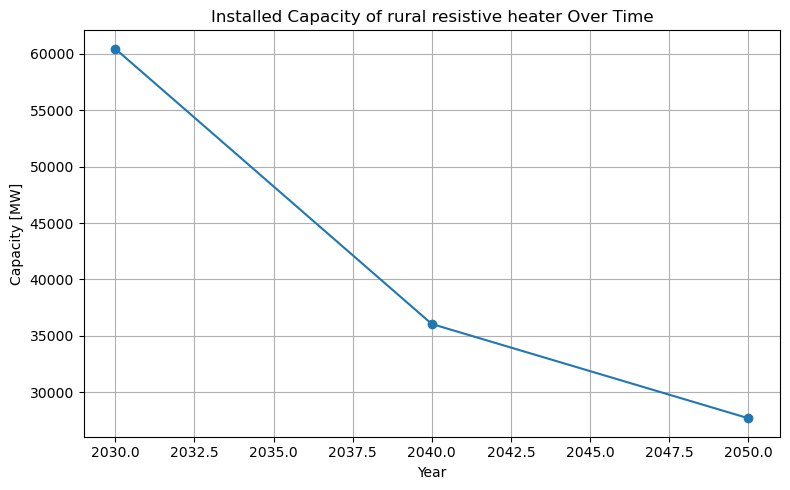

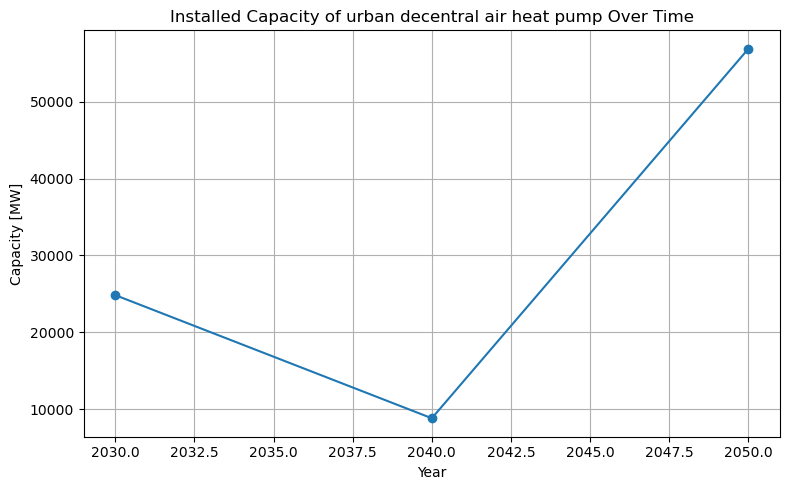

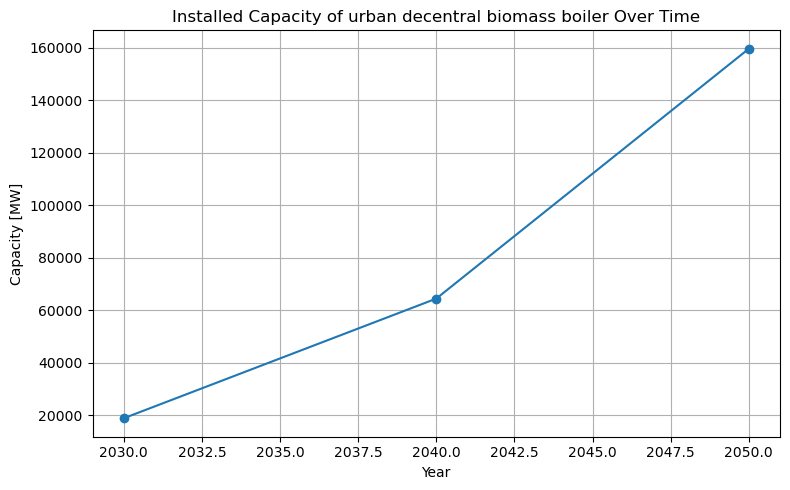

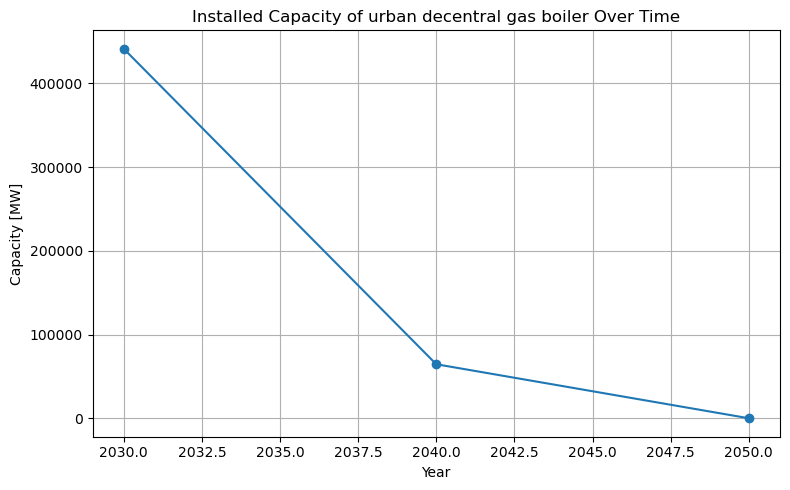

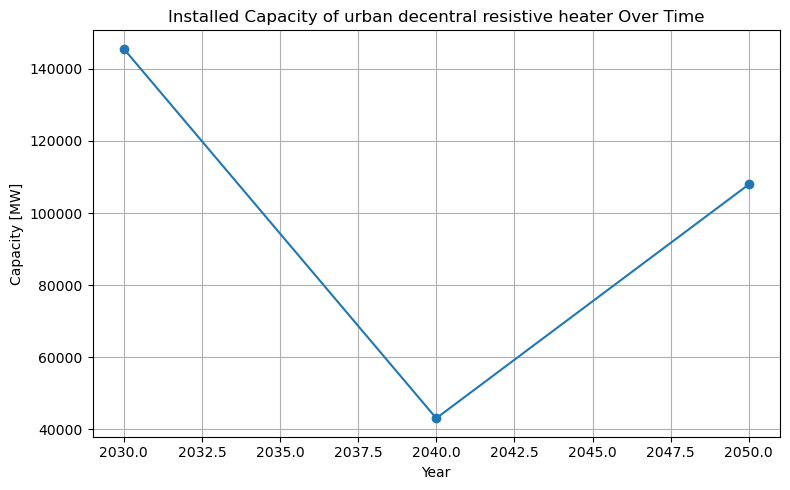

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary of preloaded networks
networks = {
    2025: n_2025,
    2030: n_2030,
    2040: n_2040,
    2050: n_2050,
}

# Dictionary to hold capacities per technology per year
capacity_by_tech = {}

for year, n in networks.items():
    stats = n.statistics()  # Call the method

    # Filter rows where the component is 'Generator'
    gen_stats = stats.loc["Link"]
    print(gen_stats)

    # Loop through each carrier (technology)
    for carrier, row in gen_stats.iterrows():
        installed_capacity = row["Installed Capacity"]
        if carrier not in capacity_by_tech:
            capacity_by_tech[carrier] = {}
        capacity_by_tech[carrier][year] = installed_capacity

# Convert to DataFrame
capacity_df = pd.DataFrame(capacity_by_tech).sort_index()

# Plot one line graph per technology
for tech in capacity_df.columns:
    plt.figure(figsize=(8, 5))
    plt.plot(capacity_df.index, capacity_df[tech], marker='o', linestyle='-')
    plt.title(f"Installed Capacity of {tech} Over Time")
    plt.xlabel("Year")
    plt.ylabel("Capacity [MW]")
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"capacity_{tech}.png")  # Optional: Save figure
    plt.show()


In [36]:
n_2040.component

<bound method Network.component of Unnamed PyPSA Network
---------------------
Components:
 - Bus: 488
 - Carrier: 93
 - Generator: 831
 - GlobalConstraint: 2
 - Line: 71
 - Link: 2610
 - Load: 438
 - StorageUnit: 56
 - Store: 166
Snapshots: 1460>

In [37]:
model_statistics(n_2040)

The total system cost as defined by the objective function is :   
6.068159e+11  EUR

The number of nodes is :39

The carriers with CO2 emissions registered by the model are :  
['geothermal' 'co2']

Answer the question: are all the conventional carriers associated with a non-zero carrier carbon emission values?

The total length of AC lines and DC links in the model is:
57181.48846262081  km


The amount of energy curtailed in the model by carrier is : 
component    carrier                      
StorageUnit  Pumped Hydro Storage             5.189328e+08
             Reservoir & Dam                  6.028212e+08
Generator    Offshore Wind (AC)               4.288540e+07
             Offshore Wind (DC)               8.475731e+06
             Offshore Wind (Floating)         1.049653e+02
             Onshore Wind                     8.819498e+07
             Run of River                     3.623870e+04
             Solar                            3.194367e+07
             biogas       

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]
/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_73383/1389742215.py:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  carbon_emissions_atmosphere = network.stores_t.e['co2 atmosphere'][-1]


In [42]:
n_2030.links[n_2030.links.carrier == 'urban decentral air heat pump']

bus0  \
Link                                                          
AL0 0 urban decentral air heat pump-2030  AL0 0 low voltage   
AT0 0 urban decentral air heat pump-2030  AT0 0 low voltage   
BA0 0 urban decentral air heat pump-2030  BA0 0 low voltage   
BE0 0 urban decentral air heat pump-2030  BE0 0 low voltage   
BG0 0 urban decentral air heat pump-2030  BG0 0 low voltage   
...                                                     ...   
PL0 0 urban decentral air heat pump-2025  PL0 0 low voltage   
PT0 0 urban decentral air heat pump-2015  PT0 0 low voltage   
PT0 0 urban decentral air heat pump-2019  PT0 0 low voltage   
SE1 0 urban decentral air heat pump-2015  SE1 0 low voltage   
SE1 0 urban decentral air heat pump-2019  SE1 0 low voltage   

                                                                bus1 type  \
Link                                                                        
AL0 0 urban decentral air heat pump-2030  AL0 0 urban decentral heat        
AT0 0 urban decentral air heat pump-2030  AT0 0 urban decentral heat        
BA0 0 urban decentral air heat pump-2030  BA0 0 urban decentral heat        
BE0 0 urban decentral air heat pump-2030  BE0 0 urban decentral heat        
BG0 0 urban decentral air heat pump-2030  BG0 0 urban decentral heat        
...                                                              ...  ...   
PL0 0 urban decentral air heat pump-2025  PL0 0 urban decentral heat        
PT0 0 urban decentral air heat pump-2015  PT0 0 urban decentral heat        
PT0 0 urban decentral air heat pump-2019  PT0 0 urban decentral heat        
SE1 0 urban decentral air heat pump-2015  SE1 0 urban decentral heat        
SE1 0 urban decentral air heat pump-2019  SE1 0 urban decentral heat        

                                                                carrier  \
Link                                                                      
AL0 0 urban decentral air heat pump-2030  urban decentral air heat pump   
AT0 0 urban decentral air heat pump-2030  urban decentral air heat pump   
BA0 0 urban decentral air heat pump-2030  urban decentral air heat pump   
BE0 0 urban decentral air heat pump-2030  urban decentral air heat pump   
BG0 0 urban decentral air heat pump-2030  urban decentral air heat pump   
...                                                                 ...   
PL0 0 urban decentral air heat pump-2025  urban decentral air heat pump   
PT0 0 urban decentral air heat pump-2015  urban decentral air heat pump   
PT0 0 urban decentral air heat pump-2019  urban decentral air heat pump   
SE1 0 urban decentral air heat pump-2015  urban decentral air heat pump   
SE1 0 urban decentral air heat pump-2019  urban decentral air heat pump   

                                          efficiency  active  build_year  \
Link                                                                       
AL0 0 urban decentral air heat pump-2030         1.0    True        2030   
AT0 0 urban decentral air heat pump-2030         1.0    True        2030   
BA0 0 urban decentral air heat pump-2030         1.0    True        2030   
BE0 0 urban decentral air heat pump-2030         1.0    True        2030   
BG0 0 urban decentral air heat pump-2030         1.0    True        2030   
...                                              ...     ...         ...   
PL0 0 urban decentral air heat pump-2025         1.0    True        2025   
PT0 0 urban decentral air heat pump-2015         1.0    True        2015   
PT0 0 urban decentral air heat pump-2019         1.0    True        2019   
SE1 0 urban decentral air heat pump-2015         1.0    True        2015   
SE1 0 urban decentral air heat pump-2019         1.0    True        2019   

                                          lifetime       p_nom  p_nom_mod  \
Link                                                                        
AL0 0 urban decentral air heat pump-2030      18.0    0.000000        0.0   
AT0 0 urban decentral air heat pump-2